# Advanced Analytics and Applications - Analytics Anacondas 

## Data Collection and Preparation 


In [1]:
# import relevant libaries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob 
from vincenty import vincenty
import datetime

import geopandas
import json
# conda install h3-py -c conda-forge
from h3 import h3
from shapely.geometry import shape
from descartes import PolygonPatch

import folium

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# take a look into the data and its structure 
df = pd.read_csv("Data/2019/01/positions_nextbike_bonn_2019_01_28.csv", sep=',')
df.head()

p_rack_locks  p_bike_racks b_state  p_spot  b_active  p_booked_bikes  \
0         False             0      ok   False      True               0   
1         False             0      ok   False      True               0   
2         False             0      ok   False      True               0   
3         False             0      ok   False      True               0   
4         False             0      ok   False      True               0   

   p_place_type             datetime  b_number   trip  ...  b_lock_types  \
0            12  2019-01-28 00:00:00     44728  first  ...    frame_lock   
1            12  2019-01-28 23:59:00     44728   last  ...    frame_lock   
2            12  2019-01-28 00:00:00     44658  first  ...    frame_lock   
3            12  2019-01-28 23:59:00     44658   last  ...    frame_lock   
4            12  2019-01-28 00:00:00     44929  first  ...    frame_lock   

   city  p_number  b_pedelec_battery     p_lng b_boardcomputer  p_maintenance  \
0  bonn         0                  0  7.119859      7551003176          False   
1  bonn         0                  0  7.119811      7551003176          False   
2  bonn         0                  0  7.056917      7551020727          False   
3  bonn         0                  0  7.056791      7551020727          False   
4  bonn         0                  0  7.095922      7551006770          False   

   p_terminal_type p_bike p_bike_types  
0              NaN   True    {"71": 1}  
1              NaN   True    {"71": 1}  
2              NaN   True    {"71": 1}  
3              NaN   True    {"71": 1}  
4              NaN   True    {"71": 1}  

[5 rows x 28 columns]

In [3]:
# explore columns and its meanings 
df.columns

Index(['p_rack_locks', 'p_bike_racks', 'b_state', 'p_spot', 'b_active',
       'p_booked_bikes', 'p_place_type', 'datetime', 'b_number', 'trip',
       'p_uid', 'p_bikes', 'p_lat', 'b_electric_lock', 'b_bike_type', 'p_name',
       'p_free_racks', 'p_address', 'b_lock_types', 'city', 'p_number',
       'b_pedelec_battery', 'p_lng', 'b_boardcomputer', 'p_maintenance',
       'p_terminal_type', 'p_bike', 'p_bike_types'],
      dtype='object')

In [4]:
# look into the documentation for the meanings of the columns 
# https://api.nextbike.net/api/documentation#nextbike_api

In [5]:
# show dataframe with columns that might be useful for further analyses and the computation of trip data
df = df[["b_active","p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng","p_name","city","p_number","p_bike","p_bike_types"]]


In [6]:
df.head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
0       True            12  2019-01-28 00:00:00     44728  first  12238528   
1       True            12  2019-01-28 23:59:00     44728   last  12292496   
2       True            12  2019-01-28 00:00:00     44658  first  12266270   
3       True            12  2019-01-28 23:59:00     44658   last  12266270   
4       True            12  2019-01-28 00:00:00     44929  first  12270065   
5       True            12  2019-01-28 23:59:00     44929   last  12270065   
6       True            12  2019-01-28 00:00:00     44607  first  12271247   
7       True            12  2019-01-28 23:59:00     44607   last  12307708   
8       True            12  2019-01-28 00:00:00     44650  first  12277788   
9       True            12  2019-01-28 23:59:00     44650   last  12277788   
10      True            12  2019-01-28 00:00:00     44647  first  12262294   
11      True            12  2019-01-28 23:23:00     44647  start  12262294   
12      True            12  2019-01-28 23:29:00     44647    end  12308310   
13      True            12  2019-01-28 23:59:00     44647   last  12308310   
14      True             0  2019-01-28 00:00:00     44715  first  10059545   
15      True             0  2019-01-28 23:59:00     44715   last  10059545   
16      True            12  2019-01-28 00:00:00     44931  first  12265758   
17      True            12  2019-01-28 23:59:00     44931   last  12265758   
18      True            12  2019-01-28 00:00:00     44589  first  12272694   
19      True            12  2019-01-28 23:59:00     44589   last  12307495   

    p_bikes      p_lat     p_lng                p_name  city  p_number  \
0         1  50.751664  7.119859            BIKE 44728  bonn         0   
1         1  50.751783  7.119811            BIKE 44728  bonn         0   
2         1  50.748038  7.056917            BIKE 44658  bonn         0   
3         1  50.748084  7.056791            BIKE 44658  bonn         0   
4         1  50.719922  7.095922            BIKE 44929  bonn         0   
5         1  50.719921  7.095809            BIKE 44929  bonn         0   
6         1  50.749891  7.043951            BIKE 44607  bonn         0   
7         1  50.750058  7.043390            BIKE 44607  bonn         0   
8         1  50.725752  7.034684            BIKE 44650  bonn         0   
9         1  50.725879  7.034632            BIKE 44650  bonn         0   
10        1  50.739205  7.073774            BIKE 44647  bonn         0   
11        1  50.739120  7.073766            BIKE 44647  bonn         0   
12        1  50.742764  7.073442            BIKE 44647  bonn         0   
13        1  50.742764  7.073442            BIKE 44647  bonn         0   
14        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
15        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
16        1  50.733943  7.135172            BIKE 44931  bonn         0   
17        1  50.734054  7.135160            BIKE 44931  bonn         0   
18        1  50.712694  7.108828            BIKE 44589  bonn         0   
19        1  50.713889  7.109010            BIKE 44589  bonn         0   

    p_bike p_bike_types  
0     True    {"71": 1}  
1     True    {"71": 1}  
2     True    {"71": 1}  
3     True    {"71": 1}  
4     True    {"71": 1}  
5     True    {"71": 1}  
6     True    {"71": 1}  
7     True    {"71": 1}  
8     True    {"71": 1}  
9     True    {"71": 1}  
10    True    {"71": 1}  
11    True    {"71": 1}  
12    True    {"71": 1}  
13    True    {"71": 1}  
14   False    {"71": 3}  
15   False    {"71": 3}  
16    True    {"71": 1}  
17    True    {"71": 1}  
18    True    {"71": 1}  
19    True    {"71": 1}

In [7]:
df["trip"].unique()

array(['first', 'last', 'start', 'end'], dtype=object)

There are four different values in the trip column [first, last, start, end]. 
At least two values are required to define whether the data set belongs to the starting point or the end of the trip. This means that one trip is represented in two rows in the dataframe. One of the rows contains the values at the starting point (i.e. datetime, start position) and the other row contains the values at the ending point of the trip. 


###### Why are there four values in the trip column? 

Let's have a deeper look in the dataframe and the trip column.

In [8]:
df[(df["trip"] == "first") | (df["trip"] =="last")].head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
0       True            12  2019-01-28 00:00:00     44728  first  12238528   
1       True            12  2019-01-28 23:59:00     44728   last  12292496   
2       True            12  2019-01-28 00:00:00     44658  first  12266270   
3       True            12  2019-01-28 23:59:00     44658   last  12266270   
4       True            12  2019-01-28 00:00:00     44929  first  12270065   
5       True            12  2019-01-28 23:59:00     44929   last  12270065   
6       True            12  2019-01-28 00:00:00     44607  first  12271247   
7       True            12  2019-01-28 23:59:00     44607   last  12307708   
8       True            12  2019-01-28 00:00:00     44650  first  12277788   
9       True            12  2019-01-28 23:59:00     44650   last  12277788   
10      True            12  2019-01-28 00:00:00     44647  first  12262294   
13      True            12  2019-01-28 23:59:00     44647   last  12308310   
14      True             0  2019-01-28 00:00:00     44715  first  10059545   
15      True             0  2019-01-28 23:59:00     44715   last  10059545   
16      True            12  2019-01-28 00:00:00     44931  first  12265758   
17      True            12  2019-01-28 23:59:00     44931   last  12265758   
18      True            12  2019-01-28 00:00:00     44589  first  12272694   
19      True            12  2019-01-28 23:59:00     44589   last  12307495   
20      True            12  2019-01-28 00:00:00     44691  first  12257366   
21      True            12  2019-01-28 23:59:00     44691   last  12257366   

    p_bikes      p_lat     p_lng                p_name  city  p_number  \
0         1  50.751664  7.119859            BIKE 44728  bonn         0   
1         1  50.751783  7.119811            BIKE 44728  bonn         0   
2         1  50.748038  7.056917            BIKE 44658  bonn         0   
3         1  50.748084  7.056791            BIKE 44658  bonn         0   
4         1  50.719922  7.095922            BIKE 44929  bonn         0   
5         1  50.719921  7.095809            BIKE 44929  bonn         0   
6         1  50.749891  7.043951            BIKE 44607  bonn         0   
7         1  50.750058  7.043390            BIKE 44607  bonn         0   
8         1  50.725752  7.034684            BIKE 44650  bonn         0   
9         1  50.725879  7.034632            BIKE 44650  bonn         0   
10        1  50.739205  7.073774            BIKE 44647  bonn         0   
13        1  50.742764  7.073442            BIKE 44647  bonn         0   
14        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
15        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
16        1  50.733943  7.135172            BIKE 44931  bonn         0   
17        1  50.734054  7.135160            BIKE 44931  bonn         0   
18        1  50.712694  7.108828            BIKE 44589  bonn         0   
19        1  50.713889  7.109010            BIKE 44589  bonn         0   
20        1  50.747417  7.125076            BIKE 44691  bonn         0   
21        1  50.747393  7.125176            BIKE 44691  bonn         0   

    p_bike p_bike_types  
0     True    {"71": 1}  
1     True    {"71": 1}  
2     True    {"71": 1}  
3     True    {"71": 1}  
4     True    {"71": 1}  
5     True    {"71": 1}  
6     True    {"71": 1}  
7     True    {"71": 1}  
8     True    {"71": 1}  
9     True    {"71": 1}  
10    True    {"71": 1}  
13    True    {"71": 1}  
14   False    {"71": 3}  
15   False    {"71": 3}  
16    True    {"71": 1}  
17    True    {"71": 1}  
18    True    {"71": 1}  
19    True    {"71": 1}  
20    True    {"71": 1}  
21    True    {"71": 1}

In this filtered dataframe above it gets clear that the examples with the values **first** and **last** in the trip column don't make much sense. Most of the trips in this dataframe have an unlikely long trip duration. The start time of a trip is almost always at 0 AM and the end time of a trip is at 23:59 PM. 
Furthermore the start and the end positions of one trip are nearly the same. 

It could be measurement errors or other data recording procedures. <br> 
These datasets can be disregarded for the next steps, because they aren't suitable for further analyses and they don't represent a real trip.  

Another column which becomes clear is the **p_number**. If the p_number is eqaul to zero then the p_name has a value that contains 'BIKE'. IF the p_number isn't equal to zero then there exists a name for the positon. This indicates that the trip starts or ends at an official bike station. 

In [9]:
# datasets where the duration of a trip is much more meaningful  
df[(df["trip"] == "start") | (df["trip"] =="end")].head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
11      True            12  2019-01-28 23:23:00     44647  start  12262294   
12      True            12  2019-01-28 23:29:00     44647    end  12308310   
27      True            12  2019-01-28 09:37:00     44795  start  12233021   
28      True            12  2019-01-28 09:47:00     44795    end  12292170   
35      True            12  2019-01-28 08:47:00     44719  start  12276651   
36      True            12  2019-01-28 09:00:00     44719    end  12291350   
37      True            12  2019-01-28 09:07:00     44719  start  12291350   
38      True            12  2019-01-28 09:39:00     44719    end  12292023   
39      True            12  2019-01-28 16:43:00     44719  start  12294951   
40      True            12  2019-01-28 16:52:00     44719    end  12300675   
41      True            12  2019-01-28 18:27:00     44719  start  12300675   
42      True            12  2019-01-28 18:31:00     44719    end  12303153   
43      True            12  2019-01-28 21:23:00     44719  start  12305396   
44      True            12  2019-01-28 21:34:00     44719    end  12306605   
45      True            12  2019-01-28 21:51:00     44719  start  12306605   
46      True            12  2019-01-28 21:56:00     44719    end  12306978   
49      True             0  2019-01-28 14:46:00     44549  start  10058493   
50      True            12  2019-01-28 14:57:00     44549    end  12298002   
65      True            12  2019-01-28 01:06:00     44921  start  12283049   
66      True            12  2019-01-28 01:12:00     44921    end  12284986   

    p_bikes      p_lat     p_lng      p_name  city  p_number  p_bike  \
11        1  50.739120  7.073766  BIKE 44647  bonn         0    True   
12        1  50.742764  7.073442  BIKE 44647  bonn         0    True   
27        1  50.691034  7.130670  BIKE 44795  bonn         0    True   
28        1  50.686653  7.159832  BIKE 44795  bonn         0    True   
35        1  50.743868  7.079610  BIKE 44719  bonn         0    True   
36        1  50.724698  7.087712  BIKE 44719  bonn         0    True   
37        1  50.724698  7.087712  BIKE 44719  bonn         0    True   
38        1  50.724831  7.087654  BIKE 44719  bonn         0    True   
39        1  50.724819  7.087713  BIKE 44719  bonn         0    True   
40        1  50.718751  7.107172  BIKE 44719  bonn         0    True   
41        1  50.719002  7.107208  BIKE 44719  bonn         0    True   
42        1  50.721124  7.102313  BIKE 44719  bonn         0    True   
43        1  50.719947  7.102898  BIKE 44719  bonn         0    True   
44        1  50.735596  7.086045  BIKE 44719  bonn         0    True   
45        1  50.735596  7.086045  BIKE 44719  bonn         0    True   
46        1  50.732947  7.081889  BIKE 44719  bonn         0    True   
49        1  50.732863  7.083832  Karlstraße  bonn      4879   False   
50        1  50.726031  7.098794  BIKE 44549  bonn         0    True   
65        1  50.763442  7.055784  BIKE 44921  bonn         0    True   
66        1  50.755129  7.069852  BIKE 44921  bonn         0    True   

   p_bike_types  
11    {"71": 1}  
12    {"71": 1}  
27    {"71": 1}  
28    {"71": 1}  
35    {"71": 1}  
36    {"71": 1}  
37    {"71": 1}  
38    {"71": 1}  
39    {"71": 1}  
40    {"71": 1}  
41    {"71": 1}  
42    {"71": 1}  
43    {"71": 1}  
44    {"71": 1}  
45    {"71": 1}  
46    {"71": 1}  
49    {"71": 1}  
50    {"71": 1}  
65    {"71": 1}  
66    {"71": 1}

A trip consists of two successive datasets. The first contains the values at the start and the second dataset contains the values at the ending point of the trip. In the next steps we can join these datasets to one dataset, so that a trip is represented in just one dataset with features about the start and end time and the start and end location as well. 

In [2]:
# read in the availabe data for every month and day 
df = pd.DataFrame()

#read in files for each month 
# for i in range(1,13): 
#     if i <10: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/0" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     
#     else: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     

# df.reset_index(drop=True,inplace=True)
# df.to_csv("Data/compressedRawData.csv")

df = pd.read_csv("Data/compressedRawData.csv", index_col=0)


## 1. Data Collection and Preparation for the trip data

In [11]:
# there are more "start" than "end" datasets 
df["trip"].value_counts()

start    1073109
end      1049372
last      237025
first     236756
Name: trip, dtype: int64

In [12]:
# check, if the next dataset belongs to the current dataset 
# this means that they build a pair for one trip
# if they have the same trip type, we want to delete them 
deletionFilter = df["trip"] != df["trip"].shift(-1)

In [13]:
# apply the filter 
df = df[deletionFilter]
df.groupby("trip").count() 
# the number of datasets for trip types: ("start"/"end") is equal now 
# after merging these to trip data, we have to get 1049372 trips in our final dataframe

p_rack_locks  p_bike_racks  b_state   p_spot  b_active  p_booked_bikes  \
trip                                                                            
end         1049372       1049372  1049372  1049372   1049372         1049372   
first        236686        236686   236686   236686    236686          236686   
last         237025        237025   237025   237025    237025          237025   
start       1049372       1049372  1049372  1049372   1049372         1049372   

       p_place_type  datetime  b_number    p_uid  ...  b_pedelec_battery  \
trip                                              ...                      
end         1049372   1049372   1049372  1049372  ...             118382   
first        236686    236686    236686   236686  ...              36318   
last         237025    237025    237025   237025  ...              35976   
start       1049372   1049372   1049372  1049372  ...             118414   

         p_lng  b_boardcomputer  p_maintenance  p_terminal_type   p_bike  \
trip                                                                       
end    1049372          1049372        1049372            46822  1049372   
first   236686           236686         236686            11018   236686   
last    237025           237025         237025             7312   237025   
start  1049372          1049372        1049372            58292  1049372   

       p_bike_types  b_battery_pack  p_special_racks  p_free_special_racks  
trip                                                                        
end         1049372             347           839769                839769  
first        236686              62           176715                176715  
last         237025              59           177473                177473  
start       1049372             364           840065                840065  

[4 rows x 30 columns]

In [14]:
# function that gets the raw data and returns the final trip data 
def get_df_final_trips(p_df): 
    
    # discard values 'first' & 'last' in trip column 
    p_df = p_df[(p_df["trip"] == "start") | (p_df["trip"]=="end")]
    
    # select useful columns for further analyses 
    # if neccessary we can add some more columns here 
    p_df = p_df[["p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng",
            "p_name","p_number","p_bike","p_spot"]]
    
    # split data into two dataframes 
    df_start = p_df[(p_df["trip"] == "start")] 
    df_end = p_df[(p_df["trip"] == "end")]

    # reset indexes to get current indexes as a further column 
    df_start.reset_index(inplace=True)
    df_end.reset_index(inplace=True)
    
    # rename columns for clarity after merging
    df_start.rename(columns={"index":"index_start",
                         "p_place_type":"p_place_type_start",
                         "datetime":"datetime_start",
                         "b_number":"b_number_start",
                         "trip":"trip_start",
                         "p_uid":"p_uid_start",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_start",
                         "p_lng":"longitude_start",
                         "p_name":"p_name_start",
                         "p_number":"p_number_start",
                         "p_bike":"p_bike_start",
                         "p_spot":"p_spot_start"},                         
                inplace=True)

    df_end.rename(columns={"index":"index_end",
                         "p_place_type":"p_place_type_end",
                         "datetime":"datetime_end",
                         "b_number":"b_number_end",
                         "trip":"trip_end",
                         "p_uid":"p_uid_end",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_end",
                         "p_lng":"longitude_end",
                         "p_name":"p_name_end",
                         "p_number":"p_number_end",
                         "p_bike":"p_bike_end",
                         "p_spot":"p_spot_end"},
                inplace=True)

    # a trip consists of two successive datasets
    # decrement index_end for merging with index_start
    df_end["index_end"] = df_end["index_end"]-1
    
    # merge the two dataframes to one 
    # the result is the dataframe that contains one trip per row
    final_trips = pd.merge(df_start,df_end,left_on="index_start", right_on="index_end")
    
    return final_trips

In [15]:
# save final trip data
final_trips = get_df_final_trips(df)

In [16]:
# as described before, we get 1049372 datasets 
final_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049372 entries, 0 to 1049371
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index_start         1049372 non-null  int64  
 1   p_place_type_start  1049372 non-null  int64  
 2   datetime_start      1049372 non-null  object 
 3   b_number_start      1049372 non-null  int64  
 4   trip_start          1049372 non-null  object 
 5   p_uid_start         1049372 non-null  int64  
 6   p_bikes_x           1049372 non-null  int64  
 7   latitude_start      1049372 non-null  float64
 8   longitude_start     1049372 non-null  float64
 9   p_name_start        1049372 non-null  object 
 10  p_number_start      1049212 non-null  float64
 11  p_bike_start        1049372 non-null  bool   
 12  p_spot_start        1049372 non-null  bool   
 13  index_end           1049372 non-null  int64  
 14  p_place_type_end    1049372 non-null  int64  
 15  datetime_end   

In [17]:
# would not make sense, if bike id is not equal at start and end location
final_trips[final_trips["b_number_start"] != final_trips["b_number_end"]]

Empty DataFrame
Columns: [index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end]
Index: []

[0 rows x 26 columns]

In [18]:
# would not make sense, if start time is later than end time of the trip
final_trips[final_trips["datetime_start"] > final_trips["datetime_end"]]

Empty DataFrame
Columns: [index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end]
Index: []

[0 rows x 26 columns]

In [19]:
final_trips.head(10)

index_start  p_place_type_start       datetime_start  b_number_start  \
0            3                  12  2019-01-20 03:20:00           44952   
1            5                  12  2019-01-20 11:51:00           44952   
2            7                  12  2019-01-20 14:32:00           44952   
3           15                  12  2019-01-20 02:21:00           44715   
4           17                  12  2019-01-20 10:50:00           44715   
5           19                  12  2019-01-20 13:25:00           44715   
6           21                  12  2019-01-20 18:33:00           44715   
7           25                  12  2019-01-20 03:08:00           44931   
8           29                  12  2019-01-20 13:23:00           44589   
9           31                  12  2019-01-20 16:40:00           44589   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  \
0      start     12040694          1       50.703284         7.154586   
1      start     12102064          1       50.716753         7.160890   
2      start     12112947          1       50.737916         7.112345   
3      start     12099152          1       50.752700         7.089911   
4      start     12101268          1       50.740355         7.097171   
5      start     12109135          1       50.733538         7.086750   
6      start     12112113          1       50.729842         7.097790   
7      start     12093216          1       50.747953         7.119311   
8      start     12094258          1       50.733517         7.100314   
9      start     12115750          1       50.733698         7.100065   

  p_name_start  ...  b_number_end  trip_end  p_uid_end  p_bikes_y  \
0   BIKE 44952  ...         44952       end   12102064          1   
1   BIKE 44952  ...         44952       end   10059156          2   
2   BIKE 44952  ...         44952       end   10044296          1   
3   BIKE 44715  ...         44715       end   12101268          1   
4   BIKE 44715  ...         44715       end   12109135          1   
5   BIKE 44715  ...         44715       end   12112113          1   
6   BIKE 44715  ...         44715       end   12118255          1   
7   BIKE 44931  ...         44931       end   12115375          1   
8   BIKE 44589  ...         44589       end   12094258          1   
9   BIKE 44589  ...         44589       end   12116372          1   

   latitude_end longitude_end          p_name_end p_number_end  p_bike_end  \
0     50.716569      7.160905          BIKE 44952          0.0        True   
1     50.737971      7.113851    Hans-Steger-Ufer       4890.0       False   
2     50.714610      7.160082  Bahnhof Oberkassel       4743.0       False   
3     50.740347      7.097133          BIKE 44715          0.0        True   
4     50.733742      7.086432          BIKE 44715          0.0        True   
5     50.729742      7.097689          BIKE 44715          0.0        True   
6     50.720507      7.087529          BIKE 44715          0.0        True   
7     50.747769      7.119867          BIKE 44931          0.0        True   
8     50.733517      7.100314          BIKE 44589          0.0        True   
9     50.719133      7.108649          BIKE 44589          0.0        True   

   p_spot_end  
0       False  
1        True  
2        True  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  

[10 rows x 26 columns]

In [20]:
# check missing values 
final_trips.isna().any(axis=0)

index_start           False
p_place_type_start    False
datetime_start        False
b_number_start        False
trip_start            False
p_uid_start           False
p_bikes_x             False
latitude_start        False
longitude_start       False
p_name_start          False
p_number_start         True
p_bike_start          False
p_spot_start          False
index_end             False
p_place_type_end      False
datetime_end          False
b_number_end          False
trip_end              False
p_uid_end             False
p_bikes_y             False
latitude_end          False
longitude_end         False
p_name_end            False
p_number_end           True
p_bike_end            False
p_spot_end            False
dtype: bool

In [21]:
# converting objects to datetimes
final_trips["datetime_start"] = pd.to_datetime(final_trips["datetime_start"])
final_trips["datetime_end"] = pd.to_datetime(final_trips["datetime_end"])

# adding the trip duration with the difference of start and end time
final_trips["trip_duration"] = final_trips["datetime_end"] - final_trips["datetime_start"]

#converting timedelta to numeric and format in minutes 
final_trips["trip_duration"] = pd.to_numeric(final_trips["trip_duration"] / 60000000000)

## adding the weekday of the start time of a trip; stored in integers (0: monday, 6:sunday)
final_trips['weekday'] = final_trips['datetime_start'].dt.dayofweek

# adding the distance between start and end position
final_trips["distance"] = final_trips[["latitude_start","longitude_start","latitude_end","longitude_end"]].apply(
    lambda x: vincenty([x[0], x[1]],
                       [x[2], x[3]]),axis=1)

In [22]:
# function which returns True for saturday and sunday; otherwise it returns False
def isWeekend(index_of_day): 
    if index_of_day > 4: 
        return 1 
    else: 
        return 0

In [23]:
# adding new boolean column "weekend"    
final_trips["weekend"] = final_trips["weekday"].apply(lambda x: isWeekend(x))

# transform column "datatime_start" into several columns 
final_trips["day"] = final_trips["datetime_start"].apply(lambda x: x.day)
final_trips["month"] = final_trips["datetime_start"].apply(lambda x: x.month)
final_trips["hour"] = final_trips["datetime_start"].apply(lambda x: x.hour)
final_trips["minute"] = final_trips["datetime_start"].apply(lambda x: x.minute)

In [24]:
# checking for Nan values in the columns
final_trips.isna().any(axis=0)

index_start           False
p_place_type_start    False
datetime_start        False
b_number_start        False
trip_start            False
p_uid_start           False
p_bikes_x             False
latitude_start        False
longitude_start       False
p_name_start          False
p_number_start         True
p_bike_start          False
p_spot_start          False
index_end             False
p_place_type_end      False
datetime_end          False
b_number_end          False
trip_end              False
p_uid_end             False
p_bikes_y             False
latitude_end          False
longitude_end         False
p_name_end            False
p_number_end           True
p_bike_end            False
p_spot_end            False
trip_duration         False
weekday               False
distance              False
weekend               False
day                   False
month                 False
hour                  False
minute                False
dtype: bool

###  Adding a column for the idle time of the bikes between trips

In [25]:
def idle_time(df):
    #'''calculates the idle times of the bikes between trips'''
    
    #adding column for the idle time
    df["idle_time"] = ''
    
    #groupby bike
    by_bike = df.groupby('b_number_start')

    all_idle_times = []
    #split by groups   
    for bike in by_bike.groups:
        this_bike = by_bike.get_group(bike)
        this_bike = this_bike.reset_index()
        #make sure that the group is sorted by datetime_start
        this_bike.sort_values(by=['datetime_start'], inplace=True)

        #loop through each row(trip) and calculate idle time between consecutive trips
        for i in range(len(this_bike.index) - 1): 
            #select end time
            end_time = this_bike.at[i, "datetime_end"]
            #select start time
            start_time = this_bike.at[i + 1, "datetime_start"]
            #calculate idle time in minutes
            idle_time = start_time - end_time
            idle_time = idle_time.total_seconds()/60
            #save the idle time in the respective row of the trip
            this_bike.at[i,'idle_time'] = idle_time
            
        #save the dataframe for one bike in the list 'all_idle_times'   
        all_idle_times.append(this_bike)

    return all_idle_times


In [26]:
#Creates list containing the dataframes per bike (b_number_start)
idle_times_per_bike = idle_time(final_trips)

In [27]:
#Checking if the Length of the list equals the amount of different b_number_start which exist in the 'final_trips' dataframe
print(final_trips['b_number_start'].nunique() == len(idle_times_per_bike))

True


In [28]:
#Create one dataframe by concatenating the dataframes per bike
final_trips = pd.concat(idle_times_per_bike)

In [29]:
#Changing data type of 'idle_time' from object to numeric
final_trips['idle_time'] = pd.to_numeric(final_trips['idle_time'], errors='coerce').fillna(0, downcast='infer')

In [30]:
#Checking for negative idle times
final_trips[final_trips['idle_time'] < 0]

Empty DataFrame
Columns: [index, index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end, trip_duration, weekday, distance, weekend, day, month, hour, minute, idle_time]
Index: []

[0 rows x 36 columns]

In [31]:
#Sort final dataframe by 'datetime_start' instead of the bike number
final_trips.sort_values(by=['datetime_start'], inplace=True)

In [32]:
final_trips.head()

index  index_start  p_place_type_start      datetime_start  b_number_start  \
0    323         1089                  12 2019-01-20 00:04:00           44765   
0    489         1666                  12 2019-01-20 00:10:00           44638   
0    316         1061                  12 2019-01-20 00:10:00           44666   
0    220          715                  12 2019-01-20 00:11:00           44965   
0    110          379                  12 2019-01-20 00:12:00           44883   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  ...  \
0      start     12098879          1       50.732120         7.095427  ...   
0      start     12099258          1       50.724813         7.135803  ...   
0      start     12093865          1       50.737367         7.100229  ...   
0      start     12095087          1       50.740329         7.068645  ...   
0      start     12096795          1       50.737573         7.101451  ...   

  p_spot_end  trip_duration  weekday  distance  weekend  day month  hour  \
0      False              9        6  1.102344        1   20     1     0   
0      False             11        6  2.011820        1   20     1     0   
0      False              6        6  0.102004        1   20     1     0   
0      False             10        6  1.560051        1   20     1     0   
0      False              5        6  0.000000        1   20     1     0   

  minute  idle_time  
0      4        486  
0     10        203  
0     10          2  
0     11       1256  
0     12         14  

[5 rows x 36 columns]

In [33]:
final_trips['idle_time'].mean()

370.16967481503224

In [34]:
final_trips['idle_time'].max()

442852

In [35]:
final_trips['idle_time'].min()

0

## Adding weather data
#### Which weather station is suitable as the data source for different weather features?

<i> Deutscher Wetterdienst </i> has several weather stations in Germany, which can be looked up [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/TU_Stundenwerte_Beschreibung_Stationen.txt)

There are 5 weather stations in and around the city of Bonn. Unfortunately the stations in Bonn don't supply data for the year 2019. 

<img src='Data/bonn.jpg'/>

We have to check which of the remaining stations are closer to the city center of Bonn. For this we can use the functions of the libary <i> vincenty <i/>.

In [36]:
# distance in kilometers from Köln-Bonn to Bonn city center 
vincenty([50.8646,7.1575],[50.7285,7.0839])

16.004915

In [37]:
# distance in kilometers from Königswinter-Heiderhof to Bonn city center 
vincenty([50.7290,7.2047],[50.7285,7.0839])

8.529407

Königswinter-Heiderhof is closer to the city center of Bonn. 

#### Reading the weather data for Königswinter-Heiderhof

In [38]:
# read in temperature data for 2019, select useful columns
temp = pd.read_csv("Data/Temperature.txt", sep = ";")
temp.rename(columns = {"TT_TU":"temperature °C", "MESS_DATUM":"datetime", "RF_TU": "relative_humidity"}, inplace=True)
temp.drop(labels=["STATIONS_ID", "QN_9", "eor"], axis=1, inplace=True)
temp = temp[(temp["datetime"] >= 2019010100) & (temp["datetime"] <= 2019123123)]
temp.reset_index(drop=True, inplace=True)
temp

datetime  temperature °C  relative_humidity
0     2019010100             7.6               94.0
1     2019010101             7.5               93.0
2     2019010102             7.4               92.0
3     2019010103             7.5               85.0
4     2019010104             6.8               94.0
...          ...             ...                ...
8755  2019123119             0.8               99.0
8756  2019123120             1.3               99.0
8757  2019123121             0.7               99.0
8758  2019123122             0.6              100.0
8759  2019123123             1.1               95.0

[8760 rows x 3 columns]

In [39]:
# read in precipitation data for 2019, select useful columns
# Köln Bonn used, because the data for precipitation in Königswinter is not completely for 2019
precipitation = pd.read_csv("Data/Precipitation.txt", sep = ";")
precipitation.rename(columns = {"  R1":"precipitaion_level (mm)", "MESS_DATUM":"datetime", "RS_IND": "precipitation y/n"}, inplace=True)
precipitation.drop(labels=["STATIONS_ID", "QN_8", "eor","WRTR"], axis=1, inplace=True)
precipitation = precipitation[(precipitation["datetime"] >= 2019010100) & (precipitation["datetime"] <= 2019123123)]
precipitation.reset_index(drop=True, inplace=True)
precipitation

datetime  precipitaion_level (mm)  precipitation y/n
0     2019010100                      0.0                  0
1     2019010101                      0.0                  0
2     2019010102                      0.0                  0
3     2019010103                      0.0                  1
4     2019010104                      0.0                  1
...          ...                      ...                ...
8755  2019123119                      0.0                  0
8756  2019123120                      0.0                  0
8757  2019123121                      0.0                  0
8758  2019123122                      0.0                  0
8759  2019123123                      0.0                  0

[8760 rows x 3 columns]

In [40]:
# read in wind data for 2019, select useful columns
# data for 36 hours missing (result = 8723 rows instead of 8760)
wind = pd.read_csv("Data/Wind.txt", sep = ";")
wind.rename(columns = {"   F":"average_wind_speed (m/s)", "MESS_DATUM":"datetime"}, inplace=True)
wind.drop(labels=["STATIONS_ID", "QN_3", "eor","   D"], axis=1, inplace=True)
wind = wind[(wind["datetime"] >= 2019010100) & (wind["datetime"] <= 2019123123)]
wind.reset_index(drop=True, inplace=True)
wind

datetime  average_wind_speed (m/s)
0     2019010100                       1.8
1     2019010101                       2.0
2     2019010102                       2.4
3     2019010103                       3.3
4     2019010104                       3.3
...          ...                       ...
8718  2019123119                       1.1
8719  2019123120                       1.5
8720  2019123121                       1.5
8721  2019123122                       1.3
8722  2019123123                       1.5

[8723 rows x 2 columns]

In [41]:
# concatenate and merge weather data to final dateframe 
weather = pd.concat([temp, precipitation.drop("datetime",axis=1)],axis=1)
weather = pd.merge(weather, wind,on="datetime",how="left")

# wind data for 36 hours missing (result = 8723 rows instead of 8760)
weather.isna().any(axis=0)

datetime                    False
temperature °C              False
relative_humidity           False
precipitaion_level (mm)     False
precipitation y/n           False
average_wind_speed (m/s)     True
dtype: bool

In [42]:
weather.to_csv("Data/final_weather.csv")
weather

datetime  temperature °C  relative_humidity  precipitaion_level (mm)  \
0     2019010100             7.6               94.0                      0.0   
1     2019010101             7.5               93.0                      0.0   
2     2019010102             7.4               92.0                      0.0   
3     2019010103             7.5               85.0                      0.0   
4     2019010104             6.8               94.0                      0.0   
...          ...             ...                ...                      ...   
8755  2019123119             0.8               99.0                      0.0   
8756  2019123120             1.3               99.0                      0.0   
8757  2019123121             0.7               99.0                      0.0   
8758  2019123122             0.6              100.0                      0.0   
8759  2019123123             1.1               95.0                      0.0   

      precipitation y/n  average_wind_speed (m/s)  
0                     0                       1.8  
1                     0                       2.0  
2                     0                       2.4  
3                     1                       3.3  
4                     1                       3.3  
...                 ...                       ...  
8755                  0                       1.1  
8756                  0                       1.5  
8757                  0                       1.5  
8758                  0                       1.3  
8759                  0                       1.5  

[8760 rows x 6 columns]

In [43]:
def formatDatetimeForMerging(x):
    # return as integer for merging 
    return int(x[:13].replace('-','').replace(' ',''))

In [44]:
final_trips["datetime_start_for_merge_with_data"] = final_trips["datetime_start"].apply(lambda x: formatDatetimeForMerging(str(x)))


In [45]:
# final dataframe, trips with weather data 
trips_weather = pd.merge(final_trips, weather, left_on="datetime_start_for_merge_with_data", right_on="datetime")

In [46]:
trips_weather.head(10)

index  index_start  p_place_type_start      datetime_start  b_number_start  \
0    323         1089                  12 2019-01-20 00:04:00           44765   
1    489         1666                  12 2019-01-20 00:10:00           44638   
2    316         1061                  12 2019-01-20 00:10:00           44666   
3    220          715                  12 2019-01-20 00:11:00           44965   
4    110          379                  12 2019-01-20 00:12:00           44883   
5    276          921                  12 2019-01-20 00:12:00           44706   
6    120          405                  12 2019-01-20 00:12:00           44500   
7    170          557                  12 2019-01-20 00:14:00           44642   
8    207          683                  12 2019-01-20 00:14:00           44608   
9     64          213                  12 2019-01-20 00:15:00           44723   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  ...  \
0      start     12098879          1       50.732120         7.095427  ...   
1      start     12099258          1       50.724813         7.135803  ...   
2      start     12093865          1       50.737367         7.100229  ...   
3      start     12095087          1       50.740329         7.068645  ...   
4      start     12096795          1       50.737573         7.101451  ...   
5      start     12090662          1       50.732004         7.095190  ...   
6      start     12099188          1       50.732351         7.095497  ...   
7      start     12095397          1       50.731698         7.092452  ...   
8      start     12098973          1       50.722742         7.087852  ...   
9      start     12089154          1       50.737088         7.103781  ...   

  hour  minute  idle_time  datetime_start_for_merge_with_data    datetime  \
0    0       4        486                          2019012000  2019012000   
1    0      10        203                          2019012000  2019012000   
2    0      10          2                          2019012000  2019012000   
3    0      11       1256                          2019012000  2019012000   
4    0      12         14                          2019012000  2019012000   
5    0      12         13                          2019012000  2019012000   
6    0      12       2405                          2019012000  2019012000   
7    0      14        184                          2019012000  2019012000   
8    0      14        876                          2019012000  2019012000   
9    0      15          1                          2019012000  2019012000   

   temperature °C relative_humidity  precipitaion_level (mm)  \
0            -4.1              82.0                      0.0   
1            -4.1              82.0                      0.0   
2            -4.1              82.0                      0.0   
3            -4.1              82.0                      0.0   
4            -4.1              82.0                      0.0   
5            -4.1              82.0                      0.0   
6            -4.1              82.0                      0.0   
7            -4.1              82.0                      0.0   
8            -4.1              82.0                      0.0   
9            -4.1              82.0                      0.0   

  precipitation y/n  average_wind_speed (m/s)  
0                 0                       2.5  
1                 0                       2.5  
2                 0                       2.5  
3                 0                       2.5  
4                 0                       2.5  
5                 0                       2.5  
6                 0                       2.5  
7                 0                       2.5  
8                 0                       2.5  
9                 0                       2.5  

[10 rows x 43 columns]

In [47]:
trips_weather.drop(["datetime_start_for_merge_with_data","datetime"], axis=1, inplace=True)

In [48]:
# Saving dataframe which contains trip and weather data
trips_weather.to_csv("Data/final_trips_and_weather.csv")

In [49]:
df_bonn = pd.read_csv("Data/final_trips_and_weather.csv", sep=',',index_col=0)

## H3 - Hierarchical Discretization with Hexagons

In [50]:
#creating geopandas dataframe from df_bonn by adding geometry column to dataframe
gdf_bonn = geopandas.GeoDataFrame(
    df_bonn, geometry=geopandas.points_from_xy(df_bonn.longitude_start, df_bonn.latitude_start))

In [51]:
gdf_bonn.head(5)

index  index_start  p_place_type_start       datetime_start  \
0    323         1089                  12  2019-01-20 00:04:00   
1    489         1666                  12  2019-01-20 00:10:00   
2    316         1061                  12  2019-01-20 00:10:00   
3    220          715                  12  2019-01-20 00:11:00   
4    110          379                  12  2019-01-20 00:12:00   

   b_number_start trip_start  p_uid_start  p_bikes_x  latitude_start  \
0           44765      start     12098879          1       50.732120   
1           44638      start     12099258          1       50.724813   
2           44666      start     12093865          1       50.737367   
3           44965      start     12095087          1       50.740329   
4           44883      start     12096795          1       50.737573   

   longitude_start  ... month  hour  minute  idle_time  temperature °C  \
0         7.095427  ...     1     0       4        486            -4.1   
1         7.135803  ...     1     0      10        203            -4.1   
2         7.100229  ...     1     0      10          2            -4.1   
3         7.068645  ...     1     0      11       1256            -4.1   
4         7.101451  ...     1     0      12         14            -4.1   

   relative_humidity precipitaion_level (mm)  precipitation y/n  \
0               82.0                     0.0                  0   
1               82.0                     0.0                  0   
2               82.0                     0.0                  0   
3               82.0                     0.0                  0   
4               82.0                     0.0                  0   

  average_wind_speed (m/s)                  geometry  
0                      2.5  POINT (7.09543 50.73212)  
1                      2.5  POINT (7.13580 50.72481)  
2                      2.5  POINT (7.10023 50.73737)  
3                      2.5  POINT (7.06865 50.74033)  
4                      2.5  POINT (7.10145 50.73757)  

[5 rows x 42 columns]

In [11]:
# Reading in the 'BonnGeoJSON.geojson' file which has a geometry column containing a polygon which represents the borders of Bonn
city_bounding_box = geopandas.read_file('Data/BonnGeoJSON.geojson')
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)

# Bonn boundaries
city_bounding_box_poly = city_bounding_box_json["features"][0]


In [54]:
# Computing hexagons for the Bonn polygon - in this case for a hexagon edge lenght of 9
H3_HEXAGON_RESOLUTION = 9
polygon_obj = city_bounding_box_poly["geometry"] # Bonn Boundaries 

# creating hexagons 
hexagons = h3.polyfill(geojson = polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)
hexagons

{'891fa11a287ffff',
 '891fa1c4da3ffff',
 '891fa111387ffff',
 '891fa111487ffff',
 '891fa11858bffff',
 '891fa11a853ffff',
 '891fa11a027ffff',
 '891fa11168bffff',
 '891fa11a993ffff',
 '891fa111ea3ffff',
 '891fa11a4cfffff',
 '891fa118d33ffff',
 '891fa111c4fffff',
 '891fa11aa1bffff',
 '891fa1112a7ffff',
 '891fa11100bffff',
 '891fa118087ffff',
 '891fa11a0d3ffff',
 '891fa111293ffff',
 '891fa11b197ffff',
 '891fa11a5abffff',
 '891fa11a363ffff',
 '891fa11a36fffff',
 '891fa11166fffff',
 '891fa11027bffff',
 '891fa11106bffff',
 '891fa11114fffff',
 '891fa1c4d47ffff',
 '891fa11ae83ffff',
 '891fa11a52fffff',
 '891fa111263ffff',
 '891fa1115bbffff',
 '891fa11a32fffff',
 '891fa11ac0fffff',
 '891fa111c17ffff',
 '891fa111647ffff',
 '891fa111107ffff',
 '891fa1c4877ffff',
 '891fa11adcbffff',
 '891fa111cdbffff',
 '891fa11106fffff',
 '891fa1132d3ffff',
 '891fa11abb7ffff',
 '891fa111e8fffff',
 '891fa11ab83ffff',
 '891fa11a953ffff',
 '891fa11ab53ffff',
 '891fa11b1bbffff',
 '891fa118097ffff',
 '891fa1184d7ffff',


In [57]:
# Convert H3 Indexes to Geometry Objects

# Create geo data frame
df = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'], crs="EPSG:4326")

# transform h3 to geo_boundary 
df['geometry'] = df[(df['h3_hex_id'].notna())].apply(lambda row: shape({"type": "Polygon",
                                           "coordinates": [h3.h3_to_geo_boundary(h=row["h3_hex_id"], geo_json=True)],
                                           "properties": ""
                                           }), axis=1)

In [58]:
m = folium.Map(location = [50.7323,7.1847], zoom_start=11, min_zoom=10.5, max_zoom=12)#,tiles = 'Stamen Toner')
for index, row in df.iterrows(): 
    folium.Choropleth(df.iloc[index].geometry,fill_color='transparent',line_weight=0.5).add_to(m)
m


In [59]:
# Get the hexagon for a data point
gdf_bonn["h3_hex_id"] = gdf_bonn.apply(lambda row: h3.geo_to_h3(row["latitude_start"], row["longitude_start"], H3_HEXAGON_RESOLUTION) if (row['latitude_start'] and row['longitude_start']) else 0, axis=1)

## Filtering for trips within Bonn

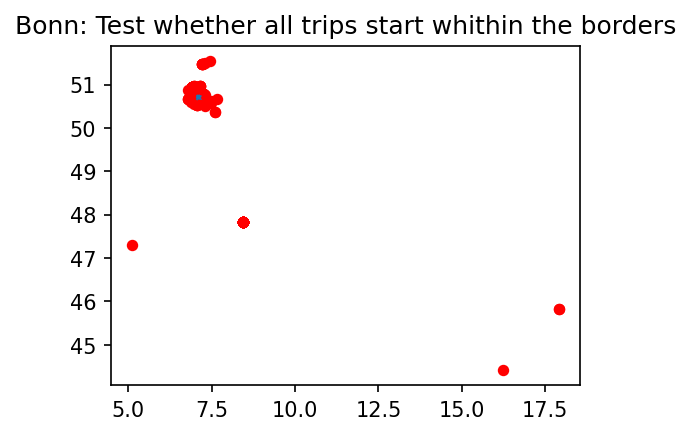

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)

gdf_bonn.plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "Neg")

city_bounding_box.plot(
    ax=ax)

ax.set(
    title='Bonn: Test whether all trips start whithin the borders', 
    aspect=1.3
    #facecolor='lightblue'
);

In [61]:
# Check wether a trip starts within the borders of Bonn or not
gdf_bonn['Bonn'] = gdf_bonn.apply(lambda x: city_bounding_box['geometry'].contains(x['geometry']), axis=1)

In [62]:
gdf_bonn["Bonn"].value_counts()

True     1036662
False      12710
Name: Bonn, dtype: int64

In [63]:
# Filter for trips which start within the borders of Bonn
bonn_trips = gdf_bonn[gdf_bonn['Bonn'] == True]

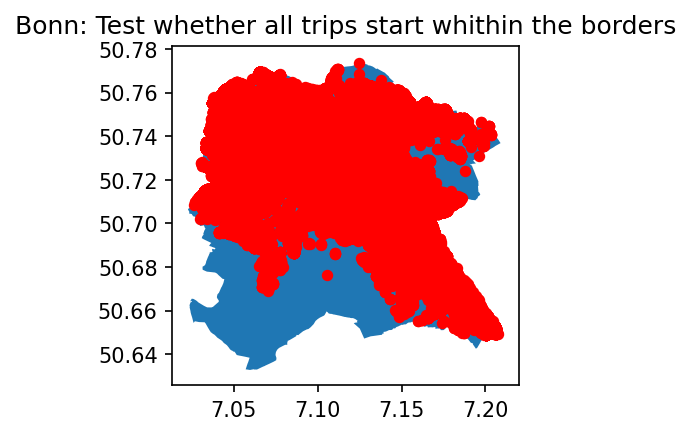

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)

city_bounding_box.plot(
    ax=ax)

bonn_trips.plot(ax =ax, markersize = 20, color = "red", marker = "o", label = "Neg")

ax.set(
    title='Bonn: Test whether all trips start whithin the borders', 
    aspect=1.3
    #facecolor='lightblue'
);

In [65]:
bonn_trips.to_csv("Data/bonn_trips.csv")

## Adding Land-use data

In the following steps the land-use data which is provided by [Copernicus - Europe's eyes on Earth](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018) is added. 

The open-data source is used to add several features to the trip data that describes the land cover at the start position of a trip. 

In [66]:
# this cell is commented becauce otherwise this code would take a lot of execution time 

# Reading in the polygon which represents the borders of Bonn'''
# city_bounding_box = geopandas.read_file('Data/BonnGeoJSON.geojson')

# Changing crs from epsg:4326 to espg:3035 since the land use data is in epsg:3035
# city_bounding_box = city_bounding_box.to_crs(epsg=3035)

# Reading in the land use data for entire Europe
# gdf = geopandas.read_file('Data/U2018_CLC2018_V2020_20u1.gdb',layer=0)

# Select the land use data for Bonn by checking which Multipolygon intersects with the Polygon of Bonn 
# for this a boolean column 'Bonn' is created
# gdf['Bonn'] = gdf.apply(lambda x: city_bounding_box['geometry'].intersects(x['geometry']), axis=1)

# filter for the land use data of Bonn
# land_use_bonn = gdf[gdf['Bonn']]

# saving the land use data of Bonn as a shapefile
# land_use_bonn.to_file('Data/Bonn_LandUse.shp') # this file is used below 

In [67]:
# read in land geodatabase / Data for Bonn
land_use_bonn_df = geopandas.read_file('Data/Bonn_LandUse.shp')

#changing crs: espg=3035 to crs: espg=4326
land_use_bonn_df = land_use_bonn_df.to_crs(epsg=4326)

In [68]:
land_use_bonn_df.head()

Code_18 Remark     Area_Ha         ID    Shape_Leng    Shape_Area  Bonn  \
0     111   None  154.483892  EU_536241   8976.113379  1.544839e+06     1   
1     112   None  472.949815  EU_542322  17521.059802  4.729498e+06     1   
2     112   None   99.244434  EU_542381   6952.700295  9.924443e+05     1   
3     112   None  128.511980  EU_542493   6094.591766  1.285120e+06     1   
4     112   None  248.371232  EU_542790   9538.857377  2.483712e+06     1   

                                            geometry  
0  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...  
1  POLYGON ((7.04673 50.64094, 7.04829 50.64017, ...  
2  POLYGON ((7.11141 50.65795, 7.11197 50.65779, ...  
3  POLYGON ((7.07876 50.68557, 7.07858 50.68528, ...  
4  POLYGON ((7.04029 50.75829, 7.04114 50.75776, ...

In [69]:
# this codes describe the land cover in Bonn
land_use_bonn_df["Code_18"].unique()

array(['111', '112', '121', '211', '231', '242', '243', '311', '312',
       '313', '141', '142', '222', '511'], dtype=object)

In [70]:
# just the code and geometry are needed
land_use_bonn_df = land_use_bonn_df[["Code_18", "geometry"]]

In [71]:
# Merging the land_use data with the bonn_trips by checking which polygon of the land_use data contains the start point of the trip
bonn_trips = geopandas.sjoin(land_use_bonn_df,bonn_trips, how='inner', op='contains')
bonn_trips.reset_index(drop=True, inplace=True)

In [72]:
# take a look at which land-code occurs most often
bonn_trips["Code_18"].value_counts()

112    684639
111    180556
121    141062
141     16716
211      6813
231      3121
511      1893
311      1135
313       491
242       197
243        28
312        11
Name: Code_18, dtype: int64

#### Legend of land-codes 
* 112 - Discontinuous urban fabric
* 111 - Continuous urban fabric
* 121 - Industrial or commercial units
* 141 - Green urban areas
* 211 - Non-irrigated arable land
* 231 - Pastures
* 511 - Water courses
* 311 - Broad-leaved forest
* 313 - Mixed forest
* 242 - Complex cultivation patterns
* 243 - Land principally occupied by agriculture, with significant areas of natural vegetation
* 312 - Coniferous forest
* 142 - Sport and leisure facilities

In [73]:
# visualize the differnt land covers 
m = folium.Map(location = [50.7323,7.1847],min_zoom=9,max_zoom=12, zoom_start=10)
for index, row in land_use_bonn_df.iterrows():    
    folium.Choropleth(land_use_bonn_df.iloc[index].geometry,
                      fill_color='black').add_to(m)
m

In [74]:
# create land use features
bonn_trips["urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="112" or x=="111" else 0) 
bonn_trips["discontinuous_urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="112" else 0) 
bonn_trips["continuous_urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="111" else 0) 
bonn_trips["industry_commercial"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="121" else 0) 
bonn_trips["green_urban_area"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="141" else 0)
bonn_trips["agricultural_area"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="211" or x=="231" else 0)
bonn_trips["forest"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="311" or x=="313" or x=="312" else 0) 
bonn_trips["water_courses"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="511" else 0)

In [75]:
bonn_trips.head()

Code_18                                           geometry  index_right  \
0     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       858831   
1     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...        59276   
2     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...         6851   
3     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       580120   
4     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       180659   

    index  index_start  p_place_type_start       datetime_start  \
0  856969      2100345                  12  2019-10-16 17:02:00   
1   58886       157114                  12  2019-02-26 20:33:00   
2    7118        20759                  12  2019-01-27 07:18:00   
3  577820      1429508                  12  2019-07-26 17:36:00   
4  180733       479187                  12  2019-04-17 10:25:00   

   b_number_start trip_start  p_uid_start  ...        h3_hex_id  Bonn  \
0           44805      start     23537268  ...  891fa11140fffff  True   
1           45050      start     13007405  ...  891fa11140fffff  True   
2           44961      start     12265750  ...  891fa11140fffff  True   
3           44857      start     19625824  ...  891fa11140fffff  True   
4           45195      start     14583112  ...  891fa11140fffff  True   

   urban_fabric discontinuous_urban_fabric  continuous_urban_fabric  \
0             1                          0                        1   
1             1                          0                        1   
2             1                          0                        1   
3             1                          0                        1   
4             1                          0                        1   

   industry_commercial  green_urban_area  agricultural_area  forest  \
0                    0                 0                  0       0   
1                    0                 0                  0       0   
2                    0                 0                  0       0   
3                    0                 0                  0       0   
4                    0                 0                  0       0   

  water_courses  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 54 columns]

In [76]:
bonn_trips.columns

Index(['Code_18', 'geometry', 'index_right', 'index', 'index_start',
       'p_place_type_start', 'datetime_start', 'b_number_start', 'trip_start',
       'p_uid_start', 'p_bikes_x', 'latitude_start', 'longitude_start',
       'p_name_start', 'p_number_start', 'p_bike_start', 'p_spot_start',
       'index_end', 'p_place_type_end', 'datetime_end', 'b_number_end',
       'trip_end', 'p_uid_end', 'p_bikes_y', 'latitude_end', 'longitude_end',
       'p_name_end', 'p_number_end', 'p_bike_end', 'p_spot_end',
       'trip_duration', 'weekday', 'distance', 'weekend', 'day', 'month',
       'hour', 'minute', 'idle_time', 'temperature °C', 'relative_humidity',
       'precipitaion_level (mm)', 'precipitation y/n',
       'average_wind_speed (m/s)', 'h3_hex_id', 'Bonn', 'urban_fabric',
       'discontinuous_urban_fabric', 'continuous_urban_fabric',
       'industry_commercial', 'green_urban_area', 'agricultural_area',
       'forest', 'water_courses'],
      dtype='object')

In [77]:
bonn_trips.drop("geometry",axis=1,inplace=True)
bonn_trips.to_csv("Data/bonn_trips.csv")

## Adding data of the bus and train network

The website opendata.bonn.de provides data about its bus and train network. In the next steps the bus and train stations are used to calculate the distance to the closest bus/train station from the start place of a trip. 

The data can be downloaded [here.](https://opendata.bonn.de/dataset/c6dc5a54-8061-4636-9baa-5a1a58cb3704/resource/c6dc5a54-8061-4636-9baa-5a1a58cb3704)

In [78]:
# read in the stops 
# contains all stations in the area of Cologne/Bonn
stops = pd.read_csv("Data/stops.txt", index_col=0)

# filter on the stations in Bonn 
stops = stops[stops["stop_name"].apply(lambda x: x.find("Bonn")==0)][["stop_name","stop_lat","stop_lon"]].reset_index(drop=True)


In [79]:
bonn_trips = pd.read_csv("Data/bonn_trips.csv", index_col=0)

In [80]:
stops.head()

stop_name   stop_lat  stop_lon
0                      Bonn Propsthof Nord  50.739096  7.073507
1                    Bonn Bad Godesberg Bf  50.683719  7.159817
2            Bonn Bad Godesberg Stadthalle  50.680336  7.158347
3                       Bonn Museum Koenig  50.721748  7.114519
4  Bonn Bundesrechnungshof/Auswärtiges Amt  50.725560  7.111579

In [81]:
# Visualizing the bus and train stations
m = folium.Map(location = [50.7323,7.1847],min_zoom=9,max_zoom=13, zoom_start=11)
for index, stop in stops.iterrows():
    folium.CircleMarker([stop["stop_lat"],stop["stop_lon"]],
                        radius=1,
                        color="#3db7e4",
                        popup=stop['stop_name'],
                        fill=False).add_to(m)

m

In [82]:
# this takes a while 
# which is why it is commented out
# results = []
# for i,trip in bonn_trips.iterrows(): 
    # result = 1000
    # for j, stop in stops.iterrows():             
        # distance = vincenty([trip["latitude_start"],trip["longitude_start"]],[stop["stop_lat"],stop["stop_lon"]])     
        # if distance < result: 
            # result = distance
    # results.append(result)
# bonn_trips["distance_next_station"] = results  # add to trip data

In [83]:
bonn_trips

Code_18  index_right   index  index_start  p_place_type_start  \
0            111       858831  856969      2100345                  12   
1            111        59276   58886       157114                  12   
2            111         6851    7118        20759                  12   
3            111       580120  577820      1429508                  12   
4            111       180659  180733       479187                  12   
...          ...          ...     ...          ...                 ...   
1036657      313       210476  210397       554585                  12   
1036658      313       209648  206502       545027                  12   
1036659      313       416200  417067      1055726                  12   
1036660      313       211176  210398       554587                  12   
1036661      313       122221  124360       334212                  12   

              datetime_start  b_number_start trip_start  p_uid_start  \
0        2019-10-16 17:02:00           44805      start     23537268   
1        2019-02-26 20:33:00           45050      start     13007405   
2        2019-01-27 07:18:00           44961      start     12265750   
3        2019-07-26 17:36:00           44857      start     19625824   
4        2019-04-17 10:25:00           45195      start     14583112   
...                      ...             ...        ...          ...   
1036657  2019-04-26 02:54:00           45279      start     14984019   
1036658  2019-04-25 22:59:00           45279      start     14981109   
1036659  2019-06-18 13:07:00           44783      start     17572173   
1036660  2019-04-26 06:57:00           45279      start     14989090   
1036661  2019-03-30 02:00:00           45034      start     13837297   

         p_bikes_x  ...  Bonn  urban_fabric discontinuous_urban_fabric  \
0                1  ...  True             1                          0   
1                1  ...  True             1                          0   
2                1  ...  True             1                          0   
3                1  ...  True             1                          0   
4                1  ...  True             1                          0   
...            ...  ...   ...           ...                        ...   
1036657          1  ...  True             0                          0   
1036658          1  ...  True             0                          0   
1036659          1  ...  True             0                          0   
1036660          1  ...  True             0                          0   
1036661          1  ...  True             0                          0   

         continuous_urban_fabric  industry_commercial  green_urban_area  \
0                              1                    0                 0   
1                              1                    0                 0   
2                              1                    0                 0   
3                              1                    0                 0   
4                              1                    0                 0   
...                          ...                  ...               ...   
1036657                        0                    0                 0   
1036658                        0                    0                 0   
1036659                        0                    0                 0   
1036660                        0                    0                 0   
1036661                        0                    0                 0   

         agricultural_area  forest water_courses  distance_next_station  
0                        0       0             0               0.110414  
1                        0       0             0               0.109923  
2                        0       0             0               0.110648  
3                        0       0             0               0.110559  
4                        0       0             0               0.111455  
...                  

In [84]:
bonn_trips.to_csv("Data/bonn_trips.csv")

## 2. Data Collection and Preparation of the Availability Data

In [14]:
df_availability = df[["datetime","b_number","trip","p_lat","p_lng","p_name","p_bikes", "city"]]
df_availability

datetime  b_number   trip      p_lat     p_lng  \
0        2019-01-20 00:00:00     44728  first  50.751759  7.119809   
1        2019-01-20 23:59:00     44728   last  50.751840  7.119686   
2        2019-01-20 00:00:00     44952  first  50.703280  7.154667   
3        2019-01-20 03:20:00     44952  start  50.703284  7.154586   
4        2019-01-20 03:37:00     44952    end  50.716569  7.160905   
...                      ...       ...    ...        ...       ...   
2596257  2019-12-31 23:59:00     45245   last  50.730347  7.114112   
2596258  2019-12-31 18:17:00     44718  first  50.669920  7.185788   
2596259  2019-12-31 19:12:00     44718  start  50.669920  7.185803   
2596260  2019-12-31 19:14:00     44718    end  50.670884  7.185775   
2596261  2019-12-31 23:59:00     44718   last  50.670782  7.185811   

                      p_name  p_bikes  city  
0                 BIKE 44728        1  bonn  
1                 BIKE 44728        1  bonn  
2                 BIKE 44952        1  bonn  
3                 BIKE 44952        1  bonn  
4                 BIKE 44952        1  bonn  
...                      ...      ...   ...  
2596257           BIKE 45245        1  bonn  
2596258  50.670171, 7.186199        1  bonn  
2596259  50.670171, 7.186199        1  bonn  
2596260           BIKE 44718        1  bonn  
2596261           BIKE 44718        1  bonn  

[2596262 rows x 8 columns]

### Filtering for availability data within Bonn

In [9]:
#creating geopandas dataframe from df_availability by adding geometry column to dataframe
gdf_availability = geopandas.GeoDataFrame(
    df_availability, geometry=geopandas.points_from_xy(df_availability.p_lng, df_availability.p_lat))

In [15]:
# Check wether a bike is within the borders of Bonn or not
gdf_availability['Bonn'] = gdf_availability.apply(lambda x: city_bounding_box['geometry'].contains(x['geometry']), axis=1)

In [16]:
gdf_availability["Bonn"].value_counts()

True     2556403
False      39859
Name: Bonn, dtype: int64

In [17]:
# Filter for available bike which are within the borders of Bonn
gdf_availability = gdf_availability[gdf_availability['Bonn'] == True]

In [18]:
gdf_availability.to_csv("Data/bonn_availability.csv")

### Extracting month, day and hour from the datetime column

In [21]:
gdf_availability["datetime"] = pd.to_datetime(gdf_availability["datetime"])
gdf_availability["month"] = gdf_availability["datetime"].apply(lambda x: x.month)
gdf_availability["day"] = gdf_availability["datetime"].apply(lambda x: x.day)
gdf_availability["hour"] = gdf_availability["datetime"].apply(lambda x: x.hour)
gdf_availability.head()

datetime  b_number   trip      p_lat     p_lng      p_name  \
0 2019-01-20 00:00:00     44728  first  50.751759  7.119809  BIKE 44728   
1 2019-01-20 23:59:00     44728   last  50.751840  7.119686  BIKE 44728   
2 2019-01-20 00:00:00     44952  first  50.703280  7.154667  BIKE 44952   
3 2019-01-20 03:20:00     44952  start  50.703284  7.154586  BIKE 44952   
4 2019-01-20 03:37:00     44952    end  50.716569  7.160905  BIKE 44952   

   p_bikes  city                  geometry  Bonn  month  day  hour  
0        1  bonn  POINT (7.11981 50.75176)  True      1   20     0  
1        1  bonn  POINT (7.11969 50.75184)  True      1   20    23  
2        1  bonn  POINT (7.15467 50.70328)  True      1   20     0  
3        1  bonn  POINT (7.15459 50.70328)  True      1   20     3  
4        1  bonn  POINT (7.16091 50.71657)  True      1   20     3

### Adding Weather data

In [19]:
weather = pd.read_csv('Data/final_weather.csv')

In [22]:
def formatDatetimeForMerging(x):
    # return as integer for merging 
    return int(x[:13].replace('-','').replace(' ',''))

In [24]:
gdf_availability["datetime_start_for_merge_with_data"] = gdf_availability["datetime"].apply(lambda x: formatDatetimeForMerging(str(x)))

In [25]:
# final dataframe, availability with weather data 
availability_weather = pd.merge(gdf_availability, weather, left_on="datetime_start_for_merge_with_data", right_on="datetime")

In [26]:
availability_weather.head(10)

datetime_x  b_number   trip      p_lat     p_lng      p_name  \
0 2019-01-20 00:00:00     44728  first  50.751759  7.119809  BIKE 44728   
1 2019-01-20 00:00:00     44952  first  50.703280  7.154667  BIKE 44952   
2 2019-01-20 00:00:00     44929  first  50.732683  7.096606  BIKE 44929   
3 2019-01-20 00:00:00     44647  first  50.758652  7.046646  BIKE 44647   
4 2019-01-20 00:03:00     44715  first  50.752600  7.089834  BIKE 44715   
5 2019-01-20 00:00:00     44931  first  50.747858  7.119385  BIKE 44931   
6 2019-01-20 00:00:00     44589  first  50.733369  7.100393  BIKE 44589   
7 2019-01-20 00:00:00     44691  first  50.721187  7.104323  BIKE 44691   
8 2019-01-20 00:00:00     44505  first  50.721249  7.105685  BIKE 44505   
9 2019-01-20 00:00:00     44562  first  50.705031  7.152992  BIKE 44562   

   p_bikes  city                  geometry  Bonn  ...  day  hour  \
0        1  bonn  POINT (7.11981 50.75176)  True  ...   20     0   
1        1  bonn  POINT (7.15467 50.70328)  True  ...   20     0   
2        1  bonn  POINT (7.09661 50.73268)  True  ...   20     0   
3        1  bonn  POINT (7.04665 50.75865)  True  ...   20     0   
4        1  bonn  POINT (7.08983 50.75260)  True  ...   20     0   
5        1  bonn  POINT (7.11939 50.74786)  True  ...   20     0   
6        1  bonn  POINT (7.10039 50.73337)  True  ...   20     0   
7        1  bonn  POINT (7.10432 50.72119)  True  ...   20     0   
8        1  bonn  POINT (7.10569 50.72125)  True  ...   20     0   
9        1  bonn  POINT (7.15299 50.70503)  True  ...   20     0   

   datetime_start_for_merge_with_data  Unnamed: 0  datetime_y  temperature °C  \
0                          2019012000         456  2019012000            -4.1   
1                          2019012000         456  2019012000            -4.1   
2                          2019012000         456  2019012000            -4.1   
3                          2019012000         456  2019012000            -4.1   
4                          2019012000         456  2019012000            -4.1   
5                          2019012000         456  2019012000            -4.1   
6                          2019012000         456  2019012000            -4.1   
7                          2019012000         456  2019012000            -4.1   
8                          2019012000         456  2019012000            -4.1   
9                          2019012000         456  2019012000            -4.1   

   relative_humidity  precipitaion_level (mm)  precipitation y/n  \
0               82.0                      0.0                  0   
1               82.0                      0.0                  0   
2               82.0                      0.0                  0   
3               82.0                      0.0                  0   
4               82.0                      0.0                  0   
5               82.0                      0.0                  0   
6               82.0                      0.0                  0   
7               82.0                      0.0                  0   
8               82.0                      0.0                  0   
9               82.0                      0.0                  0   

   average_wind_speed (m/s)  
0                       2.5  
1                       2.5  
2                       2.5  
3                       2.5  
4                       2.5  
5                       2.5  
6                       2.5  
7                       2.5  
8                       2.5  
9                       2.5  

[10 rows x 21 columns]

In [27]:
availability_weather.drop(["datetime_start_for_merge_with_data", "Unnamed: 0", "datetime_y", "Bonn"], axis=1, inplace=True)

In [28]:
# Saving dataframe which contains availability and weather data
availability_weather.to_csv("Data/availability_and_weather.csv")

In [29]:
df_availability = pd.read_csv("Data/availability_and_weather.csv", sep=',',index_col=0)

### Adding Land-use data

In the following steps the land-use data which is provided by [Copernicus - Europe's eyes on Earth](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018) is added. 

The open-data source is used to add several features to the trip data that describes the land cover at the start position of a trip. 

In [30]:
# read in land geodatabase / Data for Bonn
land_use_bonn_df = geopandas.read_file('Data/Bonn_LandUse.shp')

#changing crs: espg=3035 to crs: espg=4326
land_use_bonn_df = land_use_bonn_df.to_crs(epsg=4326)

In [31]:
# just the code and geometry are needed
land_use_bonn_df = land_use_bonn_df[["Code_18", "geometry"]]

In [42]:
#creating geopandas dataframe from gdf_availability by adding geometry column to dataframe
gdf_availability = geopandas.GeoDataFrame(
    df_availability, geometry=geopandas.points_from_xy(gdf_availability.p_lng, gdf_availability.p_lat))

In [43]:
# Merging the land_use data with the gdf_availability by checking which polygon of the land_use data contains the location of the bike
bonn_availability = geopandas.sjoin(land_use_bonn_df,gdf_availability, how='inner', op='contains')
bonn_availability.reset_index(drop=True, inplace=True)

In [44]:
# take a look at which land-code occurs most often
bonn_availability["Code_18"].value_counts()

112    1758407
111     394252
121     321717
141      39484
211      21402
231       9792
511       5435
311       3485
313       1739
242        571
243         94
312         23
222          2
Name: Code_18, dtype: int64

#### Legend of land-codes 
* 112 - Discontinuous urban fabric
* 111 - Continuous urban fabric
* 121 - Industrial or commercial units
* 141 - Green urban areas
* 211 - Non-irrigated arable land
* 231 - Pastures
* 511 - Water courses
* 311 - Broad-leaved forest
* 313 - Mixed forest
* 242 - Complex cultivation patterns
* 243 - Land principally occupied by agriculture, with significant areas of natural vegetation
* 312 - Coniferous forest
* 142 - Sport and leisure facilities

In [45]:
# create land use features
bonn_availability["urban_fabric"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="112" or x=="111" else 0) 
bonn_availability["discontinuous_urban_fabric"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="112" else 0) 
bonn_availability["continuous_urban_fabric"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="111" else 0) 
bonn_availability["industry_commercial"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="121" else 0) 
bonn_availability["green_urban_area"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="141" else 0)
bonn_availability["agricultural_area"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="211" or x=="231" else 0)
bonn_availability["forest"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="311" or x=="313" or x=="312" else 0) 
bonn_availability["water_courses"] = bonn_availability["Code_18"].apply(lambda x: 1 if x=="511" else 0)

In [46]:
bonn_availability.head()

Code_18                                           geometry  index_right  \
0     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...      1742636   
1     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...      1345549   
2     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...      1556363   
3     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...      1247578   
4     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...      1442582   

            datetime_x  b_number   trip      p_lat     p_lng      p_name  \
0  2019-09-05 15:22:00     44737  start  50.741964  7.096117  BIKE 44737   
1  2019-07-18 07:25:00     45095    end  50.731160  7.097968  BIKE 45095   
2  2019-08-14 00:00:00     44617  first  50.754044  7.128093  BIKE 44617   
3  2019-07-10 13:54:00     45072    end  50.714960  7.038729  BIKE 45072   
4  2019-07-30 12:33:00     45091  start  50.713413  7.132230  BIKE 45091   

   p_bikes  ... precipitation y/n  average_wind_speed (m/s)  urban_fabric  \
0        1  ...                 0                       2.9             1   
1        1  ...                 0                       0.8             1   
2        1  ...                 0                       1.3             1   
3        1  ...                 0                       2.5             1   
4        1  ...                 0                       2.8             1   

   discontinuous_urban_fabric  continuous_urban_fabric  industry_commercial  \
0                           0                        1                    0   
1                           0                        1                    0   
2                           0                        1                    0   
3                           0                        1                    0   
4                           0                        1                    0   

   green_urban_area  agricultural_area  forest  water_courses  
0                 0                  0       0              0  
1                 0                  0       0              0  
2                 0                  0       0              0  
3                 0                  0       0              0  
4                 0                  0       0              0  

[5 rows x 27 columns]

In [47]:
bonn_availability.columns

Index(['Code_18', 'geometry', 'index_right', 'datetime_x', 'b_number', 'trip',
       'p_lat', 'p_lng', 'p_name', 'p_bikes', 'city', 'month', 'day', 'hour',
       'temperature °C', 'relative_humidity', 'precipitaion_level (mm)',
       'precipitation y/n', 'average_wind_speed (m/s)', 'urban_fabric',
       'discontinuous_urban_fabric', 'continuous_urban_fabric',
       'industry_commercial', 'green_urban_area', 'agricultural_area',
       'forest', 'water_courses'],
      dtype='object')

In [48]:
bonn_availability.drop("geometry",axis=1,inplace=True)
bonn_availability.to_csv("Data/bonn_availability.csv")

### Adding data of the bus and train network

The website opendata.bonn.de provides data about its bus and train network. In the next steps the bus and train stations are used to calculate the distance to the closest bus/train station from the start place of a trip. 

The data can be downloaded [here.](https://opendata.bonn.de/dataset/c6dc5a54-8061-4636-9baa-5a1a58cb3704/resource/c6dc5a54-8061-4636-9baa-5a1a58cb3704)

In [2]:
# read in the stops 
# contains all stations in the area of Cologne/Bonn
stops = pd.read_csv("Data/stops.txt", index_col=0)

# filter on the stations in Bonn 
stops = stops[stops["stop_name"].apply(lambda x: x.find("Bonn")==0)][["stop_name","stop_lat","stop_lon"]].reset_index(drop=True)


In [50]:
stops.head()

stop_name   stop_lat  stop_lon
0                      Bonn Propsthof Nord  50.739096  7.073507
1                    Bonn Bad Godesberg Bf  50.683719  7.159817
2            Bonn Bad Godesberg Stadthalle  50.680336  7.158347
3                       Bonn Museum Koenig  50.721748  7.114519
4  Bonn Bundesrechnungshof/Auswärtiges Amt  50.725560  7.111579

In [52]:
# this takes a while
# which is why it is commented out
#for i,av in bonn_availability.iterrows(): 
#    result = 1000
#    for j, stop in stops.iterrows():             
#        distance = vincenty([av["p_lat"],av["p_lng"]],[stop["stop_lat"],stop["stop_lon"]])     
#        if distance < result: 
#            result = distance
#    results.append(result)
#bonn_availability["distance_next_station"] = results  # add to availability data

In [53]:
bonn_availability

Code_18  index_right           datetime_x  b_number   trip      p_lat  \
0           111      1742636  2019-09-05 15:22:00     44737  start  50.741964   
1           111      1345549  2019-07-18 07:25:00     45095    end  50.731160   
2           111      1556363  2019-08-14 00:00:00     44617  first  50.754044   
3           111      1247578  2019-07-10 13:54:00     45072    end  50.714960   
4           111      1442582  2019-07-30 12:33:00     45091  start  50.713413   
...         ...          ...                  ...       ...    ...        ...   
2556398     313      1038547  2019-06-18 19:03:00     44819  start  50.731062   
2556399     313       971712  2019-06-12 03:56:00     44970  start  50.721827   
2556400     313       334111  2019-03-31 16:23:00     44710    end  50.732600   
2556401     313       361989  2019-04-04 05:43:00     45331  start  50.749111   
2556402     313       369961  2019-04-05 09:47:00     45385  start  50.700582   

            p_lng               p_name  p_bikes  city  ...  \
0        7.096117           BIKE 44737        1  bonn  ...   
1        7.097968           BIKE 45095        1  bonn  ...   
2        7.128093           BIKE 44617        1  bonn  ...   
3        7.038729           BIKE 45072        1  bonn  ...   
4        7.132230           BIKE 45091        1  bonn  ...   
...           ...                  ...      ...   ...  ...   
2556398  7.069969           BIKE 44819        1  bonn  ...   
2556399  7.088080           BIKE 44970        1  bonn  ...   
2556400  7.103185           BIKE 44710        1  bonn  ...   
2556401  7.084827   Am Neuen Lindenhof        1  bonn  ...   
2556402  7.145170  Langer Grabenweg 34        1  bonn  ...   

         average_wind_speed (m/s)  urban_fabric  discontinuous_urban_fabric  \
0                             2.9             1                           0   
1                             0.8             1                           0   
2                             1.3             1                           0   
3                             2.5             1                           0   
4                             2.8             1                           0   
...                           ...           ...                         ...   
2556398                       1.9             0                           0   
2556399                       0.9             0                           0   
2556400                       3.9             0                           0   
2556401                       1.8             0                           0   
2556402                       1.3             0                           0   

         continuous_urban_fabric  industry_commercial  green_urban_area  \
0                              1                    0                 0   
1                              1                    0                 0   
2                              1                    0                 0   
3                              1                    0                 0   
4                              1                    0                 0   
...                          ...                  ...               ...   
2556398                        0                    0                 0   
2556399                        0                    0                 0   
2556400                        0                    0                 0   
2556401                        0                    0                 0   
2556402                        0                    0                 0   

         agricultural_area  forest  water_courses  distance_next_station  
0                        0       0              0               0.009601  
1                        0       0              0               0.119689  
2                        0       0              0               0.027441  
3                        0       0              0               0.011172  
4                        0       0              0               0

In [55]:
bonn_availability.rename(columns={'p_bikes': 'available_bikes'}, inplace=True)

In [59]:
bonn_availability

Code_18  index_right           datetime_x  b_number   trip      p_lat  \
0           111      1742636  2019-09-05 15:22:00     44737  start  50.741964   
1           111      1345549  2019-07-18 07:25:00     45095    end  50.731160   
2           111      1556363  2019-08-14 00:00:00     44617  first  50.754044   
3           111      1247578  2019-07-10 13:54:00     45072    end  50.714960   
4           111      1442582  2019-07-30 12:33:00     45091  start  50.713413   
...         ...          ...                  ...       ...    ...        ...   
2556398     313      1038547  2019-06-18 19:03:00     44819  start  50.731062   
2556399     313       971712  2019-06-12 03:56:00     44970  start  50.721827   
2556400     313       334111  2019-03-31 16:23:00     44710    end  50.732600   
2556401     313       361989  2019-04-04 05:43:00     45331  start  50.749111   
2556402     313       369961  2019-04-05 09:47:00     45385  start  50.700582   

            p_lng               p_name  available_bikes  city  ...  \
0        7.096117           BIKE 44737                1  bonn  ...   
1        7.097968           BIKE 45095                1  bonn  ...   
2        7.128093           BIKE 44617                1  bonn  ...   
3        7.038729           BIKE 45072                1  bonn  ...   
4        7.132230           BIKE 45091                1  bonn  ...   
...           ...                  ...              ...   ...  ...   
2556398  7.069969           BIKE 44819                1  bonn  ...   
2556399  7.088080           BIKE 44970                1  bonn  ...   
2556400  7.103185           BIKE 44710                1  bonn  ...   
2556401  7.084827   Am Neuen Lindenhof                1  bonn  ...   
2556402  7.145170  Langer Grabenweg 34                1  bonn  ...   

         average_wind_speed (m/s)  urban_fabric  discontinuous_urban_fabric  \
0                             2.9             1                           0   
1                             0.8             1                           0   
2                             1.3             1                           0   
3                             2.5             1                           0   
4                             2.8             1                           0   
...                           ...           ...                         ...   
2556398                       1.9             0                           0   
2556399                       0.9             0                           0   
2556400                       3.9             0                           0   
2556401                       1.8             0                           0   
2556402                       1.3             0                           0   

         continuous_urban_fabric  industry_commercial  green_urban_area  \
0                              1                    0                 0   
1                              1                    0                 0   
2                              1                    0                 0   
3                              1                    0                 0   
4                              1                    0                 0   
...                          ...                  ...               ...   
2556398                        0                    0                 0   
2556399                        0                    0                 0   
2556400                        0                    0                 0   
2556401                        0                    0                 0   
2556402                        0                    0                 0   

         agricultural_area  forest  water_courses  distance_next_station  
0                        0       0              0               0.009601  
1                        0       0              0               0.119689  
2                        0       0              0               0.027441  
3                        0       0          

In [60]:
bonn_availability.rename(columns={'datetime_x': 'datetime', 'p_bikes': 'available_bikes'}, inplace=True)
bonn_availability.drop('index_right', axis=1, inplace=True)

In [62]:
#Convert datetime column to acutal datetime type and get the month, day and hour
bonn_availability["datetime"] = pd.to_datetime(bonn_availability["datetime"])
bonn_availability["month"] = bonn_availability["datetime"].apply(lambda x: x.month)
bonn_availability["day"] = bonn_availability["datetime"].apply(lambda x: x.day)
bonn_availability["hour"] = bonn_availability["datetime"].apply(lambda x: x.hour)
bonn_availability.head()

Code_18            datetime  b_number   trip      p_lat     p_lng  \
0     111 2019-09-05 15:22:00     44737  start  50.741964  7.096117   
1     111 2019-07-18 07:25:00     45095    end  50.731160  7.097968   
2     111 2019-08-14 00:00:00     44617  first  50.754044  7.128093   
3     111 2019-07-10 13:54:00     45072    end  50.714960  7.038729   
4     111 2019-07-30 12:33:00     45091  start  50.713413  7.132230   

       p_name  available_bikes  city  month  ...  average_wind_speed (m/s)  \
0  BIKE 44737                1  bonn      9  ...                       2.9   
1  BIKE 45095                1  bonn      7  ...                       0.8   
2  BIKE 44617                1  bonn      8  ...                       1.3   
3  BIKE 45072                1  bonn      7  ...                       2.5   
4  BIKE 45091                1  bonn      7  ...                       2.8   

   urban_fabric  discontinuous_urban_fabric  continuous_urban_fabric  \
0             1                           0                        1   
1             1                           0                        1   
2             1                           0                        1   
3             1                           0                        1   
4             1                           0                        1   

   industry_commercial  green_urban_area  agricultural_area  forest  \
0                    0                 0                  0       0   
1                    0                 0                  0       0   
2                    0                 0                  0       0   
3                    0                 0                  0       0   
4                    0                 0                  0       0   

   water_courses  distance_next_station  
0              0               0.009601  
1              0               0.119689  
2              0               0.027441  
3              0               0.011172  
4              0               0.175949  

[5 rows x 26 columns]

In [64]:
#Save final availability data
bonn_availability.to_csv('Data/bonn_availability.csv')

### Creating a datframe which shows the amount of available bikes per hexagon, month, day and hour

In [2]:
availability_data = pd.read_csv("Data/bonn_availability.csv", index_col=0)

In [3]:
availability_data.isna().any(axis=0)

Code_18                       False
datetime                      False
b_number                      False
trip                          False
p_lat                         False
p_lng                         False
p_name                        False
available_bikes               False
city                          False
month                         False
day                           False
hour                          False
temperature °C                False
relative_humidity             False
precipitaion_level (mm)       False
precipitation y/n             False
average_wind_speed (m/s)       True
urban_fabric                  False
discontinuous_urban_fabric    False
continuous_urban_fabric       False
industry_commercial           False
green_urban_area              False
agricultural_area             False
forest                        False
water_courses                 False
distance_next_station         False
dtype: bool

## Starting with Hexagon size = 7 and the following time basket:

from 5.00 to 10.59: morning\
from 11.00 to 12.59: noon\
from 13.00 to 17.59: afternoon\
from 18.00 to 22.59: evening\
from 23.00 to 4.59: night\

In [4]:
from h3 import h3 
def createHexagons(df, resolution = 8):    
    df["h3_hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["p_lat"], row["p_lng"], resolution) if (row['p_lat'] and row['p_lng']) else 0, axis=1)
    return df

In [5]:
#Creating hexagons with size 7
availability_data = createHexagons(availability_data,7)
availability_data

Code_18             datetime  b_number   trip      p_lat     p_lng  \
0            111  2019-09-05 15:22:00     44737  start  50.741964  7.096117   
1            111  2019-07-18 07:25:00     45095    end  50.731160  7.097968   
2            111  2019-08-14 00:00:00     44617  first  50.754044  7.128093   
3            111  2019-07-10 13:54:00     45072    end  50.714960  7.038729   
4            111  2019-07-30 12:33:00     45091  start  50.713413  7.132230   
...          ...                  ...       ...    ...        ...       ...   
2556398      313  2019-06-18 19:03:00     44819  start  50.731062  7.069969   
2556399      313  2019-06-12 03:56:00     44970  start  50.721827  7.088080   
2556400      313  2019-03-31 16:23:00     44710    end  50.732600  7.103185   
2556401      313  2019-04-04 05:43:00     45331  start  50.749111  7.084827   
2556402      313  2019-04-05 09:47:00     45385  start  50.700582  7.145170   

                      p_name  available_bikes  city  month  ...  urban_fabric  \
0                 BIKE 44737                1  bonn      9  ...             1   
1                 BIKE 45095                1  bonn      7  ...             1   
2                 BIKE 44617                1  bonn      8  ...             1   
3                 BIKE 45072                1  bonn      7  ...             1   
4                 BIKE 45091                1  bonn      7  ...             1   
...                      ...              ...   ...    ...  ...           ...   
2556398           BIKE 44819                1  bonn      6  ...             0   
2556399           BIKE 44970                1  bonn      6  ...             0   
2556400           BIKE 44710                1  bonn      3  ...             0   
2556401   Am Neuen Lindenhof                1  bonn      4  ...             0   
2556402  Langer Grabenweg 34                1  bonn      4  ...             0   

         discontinuous_urban_fabric  continuous_urban_fabric  \
0                                 0                        1   
1                                 0                        1   
2                                 0                        1   
3                                 0                        1   
4                                 0                        1   
...                             ...                      ...   
2556398                           0                        0   
2556399                           0                        0   
2556400                           0                        0   
2556401                           0                        0   
2556402                           0                        0   

         industry_commercial  green_urban_area  agricultural_area  forest  \
0                          0                 0                  0       0   
1                          0                 0                  0       0   
2                          0                 0                  0       0   
3                          0                 0                  0       0   
4                          0                 0                  0       0   
...                      ...               ...                ...     ...   
2556398                    0                 0                  0       1   
2556399                    0                 0                  0       1   
2556400                    0                 0                  0       1   
2556401                    0                 0                  0       1   
2556402                    0                 0                  0       1   

         water_courses  distance_next_station        h3_hex_id  
0                    0               0.009601  871fa1114ffffff  
1                    0               0.119689  871fa1116ffffff  
2                    0               0.027441  871fa1115ffffff  
3                    0               0.011172  871fa11a4ffffff  
4                    0               0.175949  871fa1113ffffff  
...

In [6]:
def create_missing_availability_per_hex(df):
    
    #first and last does not represent the behaviour of the user (only informative if NextBike distributes the bikes manually)
    #also very inconsistent which is why we do not consider it in the following analysis 
    #except for the first 'firsts' of every bik
    #Filtering for only start and end data
    trips = ['start', 'end']
    availability_data_start_end = df[df.trip.isin(trips)]
    
    #sorting by bike number and datetime
    availability_data2=availability_data_start_end.sort_values(['b_number', 'datetime'])
    
    #After checking the amount of end and start trips, we see that there is no even amount of start and end trips 
    #so let's check sequences and eliminate those that do not form a pair
    #it eliminates those where the b_number is the same and the trip type is the same of two following rows
    #and those where the bike number is not the same but the trip type is the same 
    m1 = (availability_data2['b_number'] == availability_data2['b_number'].shift(-1))
    m2 = (availability_data2['trip'] == availability_data2['trip'].shift(-1))
    m3 = (availability_data2['b_number'] != availability_data2['b_number'].shift(-1))
    m4 = (availability_data2['trip'] == availability_data2['trip'].shift(-1))
    availability = availability_data2[~((m1&m2)|(m3&m4))]
    
    #sort dataframe so that we can locate the first occurrence of every bike
    df_firstocc = df.sort_values(['month', 'day', 'hour'])
    
    #first occurence of every bike in 2019
    first_occ_ofallbikes = df_firstocc.loc[df_firstocc.trip =='first'].groupby('b_number').head(1)
    
    frames = [availability, first_occ_ofallbikes]
    availability_data_start_end_firstocc= pd.concat(frames)
    availability_data_start_end_firstocc2 = availability_data_start_end_firstocc
    
    #Adding column available bikes
    #For arriving trips (trip == 'end') and the first occurrence of every bike (trip == 'first') 1 is written into the new column, because one bike is added in each case. 
    #For starting trips (trip == 'start') 0 is written into the new column, because there is one bike leaving in each case.
    availability_data_start_end_firstocc2['available_bikes']= availability_data_start_end_firstocc2.apply(lambda x: 1 if ((x.trip == 'end')|(x.trip == 'first')) else (-1), axis=1)
    
    #Summing up of the available bike column with GroupBy to calculate the value of how many bikes come and go per hexagon, month, day and hour
    grouped_2 = availability_data_start_end_firstocc2[['h3_hex_id','month', 'day', 'hour', 'available_bikes']].groupby(['h3_hex_id','month', 'day', 'hour'], as_index = False).sum()
    
    #Sorting the data for each hexagon by month, day and hour 
    grouped_2 = grouped_2.sort_values(['month', 'day', 'hour']).groupby('h3_hex_id')
    
    all_groups = []
    for group in grouped_2.groups:
    
        group = grouped_2.get_group(group)
        group = group.reset_index()
        
        # Cumulative summing of the available bikes column per hexagon to get the number of available bikes per hexagon
        group['available_bikes']= np.cumsum(group['available_bikes'])  
    
        all_groups.append(group)

    cumulativesum_df = pd.concat(all_groups)
    
    #saving the unique h3_hex_ids
    h3_hex_ids = cumulativesum_df['h3_hex_id'].unique()
    
    #creating new dataframe with the same columns
    all_availability = pd.DataFrame(columns=["h3_hex_id", "datetime", "month","day","hour", "available_bikes"])
    
    #adding the unique h3_hex_ids
    all_availability['h3_hex_id'] = h3_hex_ids
    
    #creating a time range for the new dataframe starting from the 20/01/2019 as our provided data starts at that time
    datelist = pd.date_range('2019-01-20 00:00:00', '2019-12-31 23:59:00', freq='H').tolist()

    for i in range(0, len(h3_hex_ids)):
        all_availability['datetime'][i] = datelist
    
    s = all_availability.apply(lambda x: pd.Series(x['datetime']),axis=1).stack().reset_index(level=1, drop=True)
    s.name = 'datetime'

    all_availability = all_availability.drop('datetime', axis=1).join(s)
    
    #Extracting day, month and hour from datetime
    all_availability["datetime"] = pd.to_datetime(all_availability["datetime"])
    all_availability["day"] = all_availability["datetime"].apply(lambda x: x.day)
    all_availability["month"] = all_availability["datetime"].apply(lambda x: x.month)
    all_availability["hour"] = all_availability["datetime"].apply(lambda x: x.hour)
    
    #Merge the grouped original dataframe with the new dataframe
    availability_per_hex = pd.merge(cumulativesum_df, all_availability, left_on=['h3_hex_id', 'month', 'day', 'hour'], right_on=['h3_hex_id', 'month', 'day', 'hour'], how="outer")
    availability_per_hex = availability_per_hex.drop('available_bikes_y', axis=1)
    availability_per_hex = availability_per_hex.rename(columns= {'available_bikes_x': 'available_bikes'})
    
    #Sorting by hexagon, month, day and hour
    availability_per_hex_groups = availability_per_hex.sort_values(['h3_hex_id','month', 'day', 'hour']).groupby('h3_hex_id')
    
    all_groups = []
    #split by groups   
    for group in availability_per_hex_groups.groups:
        group = availability_per_hex_groups.get_group(group)
        group = group.reset_index()
               
        #save the dataframe for one hexagon in the list all groups  
        all_groups.append(group)

    availability_per_hex = pd.concat(all_groups)
    
    availability_per_hex = availability_per_hex.drop(['level_0', 'index'], axis=1)
    
    #Applying a forward fill per group to add the missing hourly available bikes per hexagon
    availability_per_hour = availability_per_hex.groupby(['h3_hex_id'], as_index=False).apply(lambda group: group.ffill())
    
    #Filling the remaining NaN values with 0
    availability_per_hour = availability_per_hour.fillna(0)
    
    return availability_per_hour

In [7]:
hourly_availability_per_hex = create_missing_availability_per_hex(availability_data)

In [8]:
hourly_availability_per_hex

h3_hex_id  month  day  hour  available_bikes            datetime
0     871fa1032ffffff      1   20     0              0.0 2019-01-20 00:00:00
1     871fa1032ffffff      1   20     1              0.0 2019-01-20 01:00:00
2     871fa1032ffffff      1   20     2              0.0 2019-01-20 02:00:00
3     871fa1032ffffff      1   20     3              0.0 2019-01-20 03:00:00
4     871fa1032ffffff      1   20     4              0.0 2019-01-20 04:00:00
...               ...    ...  ...   ...              ...                 ...
8299  871fa1c4dffffff     12   31    19            311.0 2019-12-31 19:00:00
8300  871fa1c4dffffff     12   31    20            310.0 2019-12-31 20:00:00
8301  871fa1c4dffffff     12   31    21            311.0 2019-12-31 21:00:00
8302  871fa1c4dffffff     12   31    22            311.0 2019-12-31 22:00:00
8303  871fa1c4dffffff     12   31    23            311.0 2019-12-31 23:00:00

[332160 rows x 6 columns]

### Adding the time basket

In [9]:
def get_timebasket(hour):
    #from 5.00 to 10.59 : Morning
    if hour>4 and hour<11:
        x=0
        
    #from 11.00 to 12.59 : noon
    if hour>10 and hour<13:
        x=1
    
    #from 13.00 to 17.59 : afternoon
    if hour>12 and hour<18:
        x=2
    
    #from 18.00 to 22.59 : evening
    if hour>17 and hour<23:
        x=3
    
    #from 23.00 to 4.59 : night
    if hour>22 or hour<5:
        x=4
    return x


In [10]:
#Creating a column which assigns a time basket to each row
hourly_availability_per_hex["time_basket"] = hourly_availability_per_hex["hour"].apply(lambda x: get_timebasket(x))
hourly_availability_per_hex

h3_hex_id  month  day  hour  available_bikes            datetime  \
0     871fa1032ffffff      1   20     0              0.0 2019-01-20 00:00:00   
1     871fa1032ffffff      1   20     1              0.0 2019-01-20 01:00:00   
2     871fa1032ffffff      1   20     2              0.0 2019-01-20 02:00:00   
3     871fa1032ffffff      1   20     3              0.0 2019-01-20 03:00:00   
4     871fa1032ffffff      1   20     4              0.0 2019-01-20 04:00:00   
...               ...    ...  ...   ...              ...                 ...   
8299  871fa1c4dffffff     12   31    19            311.0 2019-12-31 19:00:00   
8300  871fa1c4dffffff     12   31    20            310.0 2019-12-31 20:00:00   
8301  871fa1c4dffffff     12   31    21            311.0 2019-12-31 21:00:00   
8302  871fa1c4dffffff     12   31    22            311.0 2019-12-31 22:00:00   
8303  871fa1c4dffffff     12   31    23            311.0 2019-12-31 23:00:00   

      time_basket  
0               4  
1               4  
2               4  
3               4  
4               4  
...           ...  
8299            3  
8300            3  
8301            3  
8302            3  
8303            4  

[332160 rows x 7 columns]

In [11]:
#Adding the column weekday which says which day of the week it is
hourly_availability_per_hex["weekday"] = hourly_availability_per_hex["datetime"].dt.dayofweek

In [12]:
# function which returns True for saturday and sunday; otherwise it returns False
def isWeekend(index_of_day): 
    if index_of_day > 4: 
        return 1 
    else: 
        return 0

In [13]:
# adding new boolean column "weekend"    
hourly_availability_per_hex["weekend"] = hourly_availability_per_hex["weekday"].apply(lambda x: isWeekend(x))

In [34]:
# Calculating the mean of the available bikes per time basket
hourly_availability_per_hex = hourly_availability_per_hex.groupby(['h3_hex_id', 'month', 'day', 'weekday', 'weekend', 'time_basket'], as_index=False).mean()

In [35]:
hourly_availability_per_hex.drop('hour', axis=1, inplace=True)
hourly_availability_per_hex

h3_hex_id  month  day  weekday  weekend  time_basket  \
0      871fa1032ffffff      1   20        6        1            0   
1      871fa1032ffffff      1   20        6        1            1   
2      871fa1032ffffff      1   20        6        1            2   
3      871fa1032ffffff      1   20        6        1            3   
4      871fa1032ffffff      1   20        6        1            4   
...                ...    ...  ...      ...      ...          ...   
69195  871fa1c4dffffff     12   31        1        0            0   
69196  871fa1c4dffffff     12   31        1        0            1   
69197  871fa1c4dffffff     12   31        1        0            2   
69198  871fa1c4dffffff     12   31        1        0            3   
69199  871fa1c4dffffff     12   31        1        0            4   

       available_bikes   center_x  center_y  
0             0.000000  50.654619  7.214119  
1             0.000000  50.654619  7.214119  
2             0.000000  50.654619  7.214119  
3             0.000000  50.654619  7.214119  
4             0.000000  50.654619  7.214119  
...                ...        ...       ...  
69195       313.333333  50.758136  7.045302  
69196       314.000000  50.758136  7.045302  
69197       314.200000  50.758136  7.045302  
69198       310.800000  50.758136  7.045302  
69199       312.000000  50.758136  7.045302  

[69200 rows x 9 columns]

### Adding the centers of each hexagon

In [17]:
def centroid(h3hexId):
    vertexes = h3.h3_to_geo_boundary(h3hexId)
    _x_list = [vertex [0] for vertex in vertexes]
    _y_list = [vertex [1] for vertex in vertexes]
    _len = len(vertexes)
    _x = sum(_x_list) / _len
    _y = sum(_y_list) / _len
    return _x, _y

In [18]:
# Adding the center coordinates of each hexagon
hourly_availability_per_hex["center"] = hourly_availability_per_hex["h3_hex_id"].apply(lambda x: centroid(x))

In [19]:
# Extracting the latitude and longitude of the center coordinates of each hexagon
hourly_availability_per_hex["center_x"] = hourly_availability_per_hex["center"].apply(lambda x: x[0])
hourly_availability_per_hex["center_y"]  = hourly_availability_per_hex["center"].apply(lambda x: x[1])

In [20]:
hourly_availability_per_hex

h3_hex_id  month  day  weekday  weekend  time_basket  \
0      871fa1032ffffff      1   20        6        1            0   
1      871fa1032ffffff      1   20        6        1            1   
2      871fa1032ffffff      1   20        6        1            2   
3      871fa1032ffffff      1   20        6        1            3   
4      871fa1032ffffff      1   20        6        1            4   
...                ...    ...  ...      ...      ...          ...   
69195  871fa1c4dffffff     12   31        1        0            0   
69196  871fa1c4dffffff     12   31        1        0            1   
69197  871fa1c4dffffff     12   31        1        0            2   
69198  871fa1c4dffffff     12   31        1        0            3   
69199  871fa1c4dffffff     12   31        1        0            4   

       available_bikes                                    center   center_x  \
0             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
1             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
2             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
3             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
4             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
...                ...                                       ...        ...   
69195       313.333333  (50.758136109063116, 7.0453021632135675)  50.758136   
69196       314.000000  (50.758136109063116, 7.0453021632135675)  50.758136   
69197       314.200000  (50.758136109063116, 7.0453021632135675)  50.758136   
69198       310.800000  (50.758136109063116, 7.0453021632135675)  50.758136   
69199       312.000000  (50.758136109063116, 7.0453021632135675)  50.758136   

       center_y  
0      7.214119  
1      7.214119  
2      7.214119  
3      7.214119  
4      7.214119  
...         ...  
69195  7.045302  
69196  7.045302  
69197  7.045302  
69198  7.045302  
69199  7.045302  

[69200 rows x 10 columns]

In [22]:
hourly_availability_per_hex.describe()

month           day       weekday       weekend   time_basket  \
count  69200.00000  69200.000000  69200.000000  69200.000000  69200.000000   
mean       6.82948     16.034682      2.994220      0.286127      2.000000   
std        3.28202      8.836337      2.007219      0.451953      1.414224   
min        1.00000      1.000000      0.000000      0.000000      0.000000   
25%        4.00000      8.000000      1.000000      0.000000      1.000000   
50%        7.00000     16.000000      3.000000      0.000000      2.000000   
75%       10.00000     24.000000      5.000000      1.000000      3.000000   
max       12.00000     31.000000      6.000000      1.000000      4.000000   

       available_bikes      center_x      center_y  
count     69200.000000  69200.000000  69200.000000  
mean         21.495271     50.710820      7.118481  
std         172.041491      0.036899      0.055129  
min       -1557.000000     50.646902      7.017737  
25%           0.000000     50.680515      7.074485  
50%          14.333333     50.714108      7.120063  
75%          66.500000     50.740048      7.162264  
max         641.400000     50.777343      7.216912

### Adding the average of the temperature and the distance to the next station, precipitation y/n and the mode of the land use features of the hexgaon

In [24]:
availability_data["time_basket"] = availability_data["hour"].apply(lambda x: get_timebasket(x))

In [25]:
# grouped dataframe to calculate the mean of the temperature and the distance to the next station per day and timebasket 
grouped_weather = pd.DataFrame(availability_data.groupby(['time_basket', 'h3_hex_id', 'month', 'day'], as_index = False).mean())
grouped_weather.reset_index(inplace=True)
grouped_weather = grouped_weather[['time_basket', 'h3_hex_id', 'month', 'day',"temperature °C","precipitaion_level (mm)", "distance_next_station"]]
grouped_weather

time_basket        h3_hex_id  month  day  temperature °C  \
0                0  871fa1032ffffff      4   12        3.845455   
1                0  871fa1032ffffff      4   14        0.000000   
2                0  871fa1032ffffff      4   15        4.600000   
3                0  871fa1032ffffff      4   21       16.800000   
4                0  871fa1032ffffff      4   22       19.700000   
...            ...              ...    ...  ...             ...   
46676            4  871fa1c4dffffff     12   27        2.900000   
46677            4  871fa1c4dffffff     12   28       -0.011111   
46678            4  871fa1c4dffffff     12   29       -0.436752   
46679            4  871fa1c4dffffff     12   30        0.552857   
46680            4  871fa1c4dffffff     12   31        1.585185   

       precipitaion_level (mm)  distance_next_station  
0                     0.000000               0.254235  
1                     0.000000               0.247852  
2                     0.000000               0.247852  
3                     0.000000               0.657147  
4                     0.000000               0.396565  
...                        ...                    ...  
46676                 0.092982               0.161988  
46677                 0.000000               0.148554  
46678                 0.000000               0.148114  
46679                 0.000000               0.139345  
46680                 0.000000               0.129141  

[46681 rows x 7 columns]

In [26]:
# grouped dataframe to get "precipitation y/n" for the group
grouped_rain_bool = pd.DataFrame(availability_data.groupby(['time_basket', 'h3_hex_id', 'month', 'day'], as_index = False).max())
grouped_rain_bool.reset_index(inplace=True)
grouped_rain_bool = grouped_rain_bool[['time_basket', 'h3_hex_id', 'month', 'day',"precipitation y/n"]]
grouped_rain_bool

time_basket        h3_hex_id  month  day  precipitation y/n
0                0  871fa1032ffffff      4   12                  0
1                0  871fa1032ffffff      4   14                  0
2                0  871fa1032ffffff      4   15                  0
3                0  871fa1032ffffff      4   21                  0
4                0  871fa1032ffffff      4   22                  0
...            ...              ...    ...  ...                ...
46676            4  871fa1c4dffffff     12   27                  1
46677            4  871fa1c4dffffff     12   28                  0
46678            4  871fa1c4dffffff     12   29                  0
46679            4  871fa1c4dffffff     12   30                  0
46680            4  871fa1c4dffffff     12   31                  0

[46681 rows x 5 columns]

In [27]:
# group by hex, month, day and timebasket 
# use the value for the land features that occurs most often within one group
grouped_land_use = pd.DataFrame(availability_data.groupby(['h3_hex_id','month', 'day', 'time_basket'], as_index = False)
                                ['urban_fabric', 'discontinuous_urban_fabric', 'continuous_urban_fabric','industry_commercial', 
                                 'green_urban_area', 'agricultural_area', 'forest', 'water_courses'].agg(lambda x:x.value_counts().index[0]))
grouped_land_use.reset_index(inplace=True,drop=True)
grouped_land_use

h3_hex_id  month  day  time_basket  urban_fabric  \
0      871fa1032ffffff      3    3            2             1   
1      871fa1032ffffff      3   21            3             1   
2      871fa1032ffffff      3   21            4             1   
3      871fa1032ffffff      3   22            4             1   
4      871fa1032ffffff      3   23            2             1   
...                ...    ...  ...          ...           ...   
46676  871fa1c4dffffff     12   31            0             1   
46677  871fa1c4dffffff     12   31            1             1   
46678  871fa1c4dffffff     12   31            2             1   
46679  871fa1c4dffffff     12   31            3             1   
46680  871fa1c4dffffff     12   31            4             1   

       discontinuous_urban_fabric  continuous_urban_fabric  \
0                               1                        0   
1                               0                        1   
2                               1                        0   
3                               1                        1   
4                               1                        0   
...                           ...                      ...   
46676                           1                        0   
46677                           1                        0   
46678                           1                        0   
46679                           1                        0   
46680                           1                        0   

       industry_commercial  green_urban_area  agricultural_area  forest  \
0                        0                 0                  0       0   
1                        0                 0                  0       0   
2                        0                 0                  0       0   
3                        0                 0                  0       0   
4                        0                 0                  0       0   
...                    ...               ...                ...     ...   
46676                    0                 0                  0       0   
46677                    0                 0                  0       0   
46678                    0                 0                  0       0   
46679                    0                 0                  0       0   
46680                    0                 0                  0       0   

       water_courses  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
46676              0  
46677              0  
46678              0  
46679              0  
46680              0  

[46681 rows x 12 columns]

In [28]:
# merge mean temperature with the demands 
df_availability = hourly_availability_per_hex.merge(grouped_weather, on=['time_basket', 'h3_hex_id', 'month', 'day'], how="inner")

# merge to get value for precipitation as a boolean value 
df_availability = df_availability.merge(grouped_rain_bool, on=['time_basket', 'h3_hex_id', 'month', 'day'], how="inner")

# merge to get the correct values for the land features
df_availability = df_availability.merge(grouped_land_use,on=['time_basket', 'h3_hex_id', 'month', 'day'], how="inner")

df_availability

h3_hex_id  month  day  weekday  weekend  time_basket  \
0      871fa1032ffffff      3    3        6        1            2   
1      871fa1032ffffff      3   21        3        0            3   
2      871fa1032ffffff      3   21        3        0            4   
3      871fa1032ffffff      3   22        4        0            4   
4      871fa1032ffffff      3   23        5        1            2   
...                ...    ...  ...      ...      ...          ...   
46676  871fa1c4dffffff     12   31        1        0            0   
46677  871fa1c4dffffff     12   31        1        0            1   
46678  871fa1c4dffffff     12   31        1        0            2   
46679  871fa1c4dffffff     12   31        1        0            3   
46680  871fa1c4dffffff     12   31        1        0            4   

       available_bikes                                    center   center_x  \
0             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
1             0.800000    (50.65461869788869, 7.214118833734157)  50.654619   
2             0.166667    (50.65461869788869, 7.214118833734157)  50.654619   
3             1.000000    (50.65461869788869, 7.214118833734157)  50.654619   
4             1.800000    (50.65461869788869, 7.214118833734157)  50.654619   
...                ...                                       ...        ...   
46676       313.333333  (50.758136109063116, 7.0453021632135675)  50.758136   
46677       314.000000  (50.758136109063116, 7.0453021632135675)  50.758136   
46678       314.200000  (50.758136109063116, 7.0453021632135675)  50.758136   
46679       310.800000  (50.758136109063116, 7.0453021632135675)  50.758136   
46680       312.000000  (50.758136109063116, 7.0453021632135675)  50.758136   

       center_y  ...  distance_next_station  precipitation y/n  urban_fabric  \
0      7.214119  ...               0.630485                  0             1   
1      7.214119  ...               0.195067                  0             1   
2      7.214119  ...               0.194145                  0             1   
3      7.214119  ...               0.311696                  0             1   
4      7.214119  ...               0.518128                  0             1   
...         ...  ...                    ...                ...           ...   
46676  7.045302  ...               0.101344                  1             1   
46677  7.045302  ...               0.111355                  0             1   
46678  7.045302  ...               0.115269                  0             1   
46679  7.045302  ...               0.107553                  0             1   
46680  7.045302  ...               0.129141                  0             1   

       discontinuous_urban_fabric  continuous_urban_fabric  \
0                               1                        0   
1                               0                        1   
2                               1                        0   
3                               1                        1   
4                               1                        0   
...                           ...                      ...   
46676                           1                        0   
46677                           1                        0   
46678                           1                        0   
46679                           1                        0   
46680                           1                        0   

       industry_commercial  green_urban_area  agricultural_area  forest  \
0                        0                 0                  0       0   
1                        0                 0                  0       0   
2                        0                 0                  0       0   
3                        0                 0                  0       0   
4                        0                 0                  0       0   
...                    ...               ...                ...     ...   
4667

In [29]:
df_availability["weekend"] = df_availability["weekend"].apply(lambda x : 1 if x else 0)

In [30]:
# create new feature for better prediction results 
# distances from the center of the hexagons to the CentralStation / University 
df_availability["distanceToCentralStation"] = df_availability[["center_x","center_y"]].apply(
    lambda x: vincenty([x[0], x[1]], [50.731944, 7.096944]), axis=1)
df_availability["distanceToUniversity"] = df_availability[["center_x","center_y"]].apply(
    lambda x: vincenty([x[0], x[1]], [50.72682, 7.0888]), axis=1)

In [31]:
df_availability.describe()
# --> min temperature doesn't make sense 
# these incorrect values are handled below 

month           day       weekday       weekend   time_basket  \
count  46681.000000  46681.000000  46681.000000  46681.000000  46681.000000   
mean       6.926694     15.975493      2.978492      0.280221      2.072985   
std        3.191802      8.862109      1.997752      0.449112      1.428339   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000      8.000000      1.000000      0.000000      1.000000   
50%        7.000000     16.000000      3.000000      0.000000      2.000000   
75%       10.000000     24.000000      5.000000      1.000000      3.000000   
max       12.000000     31.000000      6.000000      1.000000      4.000000   

       available_bikes      center_x      center_y  temperature °C  \
count     46681.000000  46681.000000  46681.000000    46681.000000   
mean         31.808150     50.717386      7.119996        8.403134   
std         208.123907      0.032227      0.050850       61.009107   
min       -1557.000000     50.646902      7.017737     -999.000000   
25%           8.500000     50.696830      7.078498        7.009091   
50%          40.333333     50.719916      7.122848       12.400000   
75%          93.000000     50.742822      7.164308       17.540000   
max         641.400000     50.777343      7.216912       39.400000   

       precipitaion_level (mm)  ...  urban_fabric  discontinuous_urban_fabric  \
count             46681.000000  ...  46681.000000                46681.000000   
mean                  0.073845  ...      0.977978                    0.919389   
std                   0.344884  ...      0.146756                    0.272240   
min                   0.000000  ...      0.000000                    0.000000   
25%                   0.000000  ...      1.000000                    1.000000   
50%                   0.000000  ...      1.000000                    1.000000   
75%                   0.000000  ...      1.000000                    1.000000   
max                  14.400000  ...      1.000000                    1.000000   

       continuous_urban_fabric  industry_commercial  green_urban_area  \
count              46681.00000         46681.000000      46681.000000   
mean                   0.04128             0.030826          0.002678   
std                    0.19894             0.172849          0.051678   
min                    0.00000             0.000000          0.000000   
25%                    0.00000             0.000000          0.000000   
50%                    0.00000             0.000000          0.000000   
75%                    0.00000             0.000000          0.000000   
max                    1.00000             1.000000          1.000000   

       agricultural_area        forest  water_courses  \
count       46681.000000  46681.000000   46681.000000   
mean            0.001907      0.000407       0.000321   
std             0.043623      0.020171       0.017923   
min             0.000000      0.000000       0.000000   
25%             0.000000      0.000000       0.000000   
50%             0.000000      0.000000       0.000000   
75%             0.000000      0.000000       0.000000   
max             1.000000      1.000000       1.000000   

       distanceToCentralStation  distanceToUniversity  
count              46681.000000          46681.000000  
mean                   4.951837              5.005145  
std                    2.549830              2.579840  
min                    1.033620              0.341213  
25%                    3.235797              2.699422  
50%                    4.666416              4.454742  
75%                    6.175811              6.298869  
max                   11.939101             11.955306  

[8 rows x 22 columns]

In [32]:
# fill incorrect values with mean values of the corresponding month
temp_means = df_availability[df_availability["temperature °C"] >= -25].groupby(["month"]).mean()[["temperature °C"]]
for i, row in df_availability.iterrows():     
    if row["temperature °C"] < -25: # lowest temperature in Germany in 2019 was about -20° Celsius 
        df_availability.at[i, "temperature °C"] = temp_means.iloc[row["month"]]        

In [36]:
df_availability

h3_hex_id  month  day  weekday  weekend  time_basket  \
0      871fa1032ffffff      3    3        6        1            2   
1      871fa1032ffffff      3   21        3        0            3   
2      871fa1032ffffff      3   21        3        0            4   
3      871fa1032ffffff      3   22        4        0            4   
4      871fa1032ffffff      3   23        5        1            2   
...                ...    ...  ...      ...      ...          ...   
46676  871fa1c4dffffff     12   31        1        0            0   
46677  871fa1c4dffffff     12   31        1        0            1   
46678  871fa1c4dffffff     12   31        1        0            2   
46679  871fa1c4dffffff     12   31        1        0            3   
46680  871fa1c4dffffff     12   31        1        0            4   

       available_bikes                                    center   center_x  \
0             0.000000    (50.65461869788869, 7.214118833734157)  50.654619   
1             0.800000    (50.65461869788869, 7.214118833734157)  50.654619   
2             0.166667    (50.65461869788869, 7.214118833734157)  50.654619   
3             1.000000    (50.65461869788869, 7.214118833734157)  50.654619   
4             1.800000    (50.65461869788869, 7.214118833734157)  50.654619   
...                ...                                       ...        ...   
46676       313.333333  (50.758136109063116, 7.0453021632135675)  50.758136   
46677       314.000000  (50.758136109063116, 7.0453021632135675)  50.758136   
46678       314.200000  (50.758136109063116, 7.0453021632135675)  50.758136   
46679       310.800000  (50.758136109063116, 7.0453021632135675)  50.758136   
46680       312.000000  (50.758136109063116, 7.0453021632135675)  50.758136   

       center_y  ...  urban_fabric  discontinuous_urban_fabric  \
0      7.214119  ...             1                           1   
1      7.214119  ...             1                           0   
2      7.214119  ...             1                           1   
3      7.214119  ...             1                           1   
4      7.214119  ...             1                           1   
...         ...  ...           ...                         ...   
46676  7.045302  ...             1                           1   
46677  7.045302  ...             1                           1   
46678  7.045302  ...             1                           1   
46679  7.045302  ...             1                           1   
46680  7.045302  ...             1                           1   

       continuous_urban_fabric  industry_commercial  green_urban_area  \
0                            0                    0                 0   
1                            1                    0                 0   
2                            0                    0                 0   
3                            1                    0                 0   
4                            0                    0                 0   
...                        ...                  ...               ...   
46676                        0                    0                 0   
46677                        0                    0                 0   
46678                        0                    0                 0   
46679                        0                    0                 0   
46680                        0                    0                 0   

       agricultural_area  forest  water_courses  distanceToCentralStation  \
0                      0       0              0                 11.939101   
1                      0       0              0                 11.939101   
2                      0       0              0                 11.939101   
3                      0       0              0                 11.939101   
4                      0       0              0                 11.939101   
...                  ...     ...            ...                       ...   
46676                  0  

In [37]:
#Save dataframe for later analyses
df_availability.to_csv('Data/availability_SVR.csv')